In [20]:
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import numpy as np

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics

import matplotlib.pyplot as plt
import seaborn as sns

import statistics

import joblib

In [21]:
# # tn, fp, fn, tp = each_index(cm)
def each_index(metrix):
    TN = metrix[0][0]
    FP = metrix[0][1]
    FN = metrix[1][0]
    TP = metrix[1][1]
    return TN, FP, FN, TP
def sensitivity(metrix):
    TN, FP, FN, TP = each_index(metrix)
    # Calculate sensitivity
    sensitivity = TP / (TP + FN) * 100
    print("Sensitivity: %.2f%%" % sensitivity)
    return sensitivity
def specificity(metrix):
    TN, FP, FN, TP = each_index(metrix)
    # Calculate specificity
    specificity = TN / (TN + FP) * 100
    print("Specificity: %.2f%%" % specificity)
    return specificity
def accuracy(metrix):
    TN, FP, FN, TP = each_index(metrix)
    # Calculate accuracy
    accuracy = ((TP + TN) / (TP + TN + FP + FN)) *100
    print("Accuracy: %.2f%%" % accuracy)
    return accuracy
def precision(metrix):
    TN, FP, FN, TP = each_index(metrix)
    # Calculate accuracy
    precision = (TP / (TP + FP)) *100
    print("Precision: %.2f%%" % precision)
    return precision
def f1(metrix):
    TN, FP, FN, TP = each_index(metrix)
    # Calculate f1
    recall = sensitivity(metrix)
    pre = precision(metrix)
    f1 = ((2*pre*recall) / (pre+recall))
    print("F1: %.2f%%" % f1)
    return f1


In [113]:
def evaluate(param,split):
    loaded_model = joblib.load('SVM_model-ROC/SVM_{}.joblib'.format(split))
    ############## validate set ################
    print("############## validate set ################")
    y_pred_val = loaded_model.predict_proba(x_val)
    print
    # Confusion matrix
    cm_val = confusion_matrix(y_val, y_pred_val)
    print('Confusion Matrix')
    print('-'*16)
    print(cm_val,'\n')
    print('-'*16)

    # Calculate score
    print(split)
    sen_val = sensitivity(cm_val)
    spec_val = specificity(cm_val)
    acc_val = accuracy(cm_val)
    pre_val = precision(cm_val)
    f1_score_val = f1(cm_val)

    # plot confusion matrix
    # plot confusion matrix
    class_names = ['benign','malignant']
    # Normalize confusion matrix to percentage
    cm_norm_val = cm_val.astype('float') / cm_val.sum(axis=1)[:, np.newaxis]
    # Create plot
    fig, ax = plt.subplots()
    im = ax.imshow(cm_norm_val, interpolation='nearest', cmap="rocket_r")
    ax.grid(False)
    # Add labels
    ax.set(xticks=np.arange(cm_norm_val.shape[1]),
           yticks=np.arange(cm_norm_val.shape[0]),
           xticklabels=class_names, yticklabels=class_names)
    ax.set_title("Validate set", fontsize=16)
    ax.set_ylabel('Actual', fontsize=16)
    ax.set_xlabel('Predicted', fontsize=16)
    # Add percentage and count values inside plot
    thresh = cm_norm_val.max() / 2.
    for i in range(cm_norm_val.shape[0]):
        for j in range(cm_norm_val.shape[1]):
            ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_val[i,j], cm_norm_val[i, j]*100),
                    ha="center", va="center",
                    color="white" if cm_norm_val[i, j] > thresh else "black",
                   fontsize=20)
    # plt.savefig('rf_model/validate_cm_{}.png'.format(split))
    # plt.savefig('rf_model/validate_cm_best_param2_{}.png'.format(split))
    plt.show()
    
    # calculate roc curves
    fpr, tpr, thresholds = metrics.roc_curve(y_true,  y_prob[:, 1])
    # get the best threshold
    J = tpr - fpr
    ix = np.argmax(J)
    best_thresh = thresholds[ix]
    print('Best Threshold=%f' % (best_thresh))
    print('FPR: %.4f\nTPR: %.4f' %(fpr[ix], tpr[ix]))
    def to_labels(pos_probs, threshold):
        return (pos_probs >= threshold).astype('int')
    
    # ################# test set ##################
    label = ['benign','malignant']
    print("################# test set ##################")
    y_pred_test = loaded_model.predict(x_test)
    # Print the predictions
    # print(y_pred)

    # Confusion matrix
    cm_test = confusion_matrix(y_test, y_pred_test)
    print('Confusion Matrix')
    print('-'*16)
    print(cm_test,'\n')
    print('-'*16)

    # Calculate score
    print(split)
    sen_test = sensitivity(cm_test)
    spec_test = specificity(cm_test)
    acc_test = accuracy(cm_test)
    pre_test = precision(cm_test)
    f1_score_test = f1(cm_test)

    # plot confusion matrix
    # plot confusion matrix
    class_names = ['benign','malignant']
    # Normalize confusion matrix to percentage
    cm_norm_test = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis]
    # Create plot
    fig, ax = plt.subplots()
    im = ax.imshow(cm_norm_test, interpolation='nearest', cmap="rocket_r")
    ax.grid(False)
    # Add labels
    ax.set(xticks=np.arange(cm_norm_test.shape[1]),
           yticks=np.arange(cm_norm_test.shape[0]),
           xticklabels=class_names, yticklabels=class_names)
    ax.set_title("Test set", fontsize=16)
    ax.set_ylabel('Actual', fontsize=16)
    ax.set_xlabel('Predicted', fontsize=16)
    # Add percentage and count values inside plot
    thresh = cm_norm_test.max() / 2.
    for i in range(cm_norm_test.shape[0]):
        for j in range(cm_norm_test.shape[1]):
            ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_test[i,j], cm_norm_test[i, j]*100),
                    ha="center", va="center",
                    color="white" if cm_norm_test[i, j] > thresh else "black",
                   fontsize=20)

    plt.show()

    ################## plot ROC curve ########################
    fpr1, tpr1, thr1 = metrics.roc_curve(y_val,  y_pred_val)
    auc1 = metrics.roc_auc_score(y_val,  y_pred_val)
    fpr2, tpr2, thr2 = metrics.roc_curve(y_test,  y_pred_test)
    auc2 = metrics.roc_auc_score(y_test,  y_pred_test)
    gmeans2 = np.sqrt(tpr2 * (1-fpr2))
    ix2 = np.argmax(gmeans2)
    print("---------------------------------------")
    print("AUC validate: %.4f" % auc1)
    print("AUC test: %.4f" % auc2)
    plt.plot(fpr1,tpr1,label="ROC valid, auc="+str("%.4f" % auc1))
    plt.plot(fpr2,tpr2,label="ROC test, auc="+str("%.4f" % auc2))
    plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

    plt.legend(loc=4)
    plt.show()
    return cm_val,cm_test,auc1,auc2


In [114]:
def setup(split):
    # setting split and path
    path = "../kitt/DATA_progress3/"
    train_path = "{}/{}/train/train_oversampling.csv".format(path,split)
    test_path =  "{}/test.csv".format(path)
    valid_path = "{}/{}/val/val.csv".format(path,split)

    print(train_path)
    # Load the train set
    train_data = pd.read_csv(train_path)
    print(train_data.shape)
    x_train = train_data[train_data.columns[2:]]
    print(x_train.shape)
    y_train = train_data[train_data.columns[1]]
    le = LabelEncoder()
    y_train = np.array(le.fit_transform(y_train))
    print(le.classes_)
    print(test_path)
    # Load the test set
    test_data = pd.read_csv(test_path)
    print(test_data.shape)
    x_test = test_data[test_data.columns[2:]]
    print(x_test.shape)
    y_test = test_data[test_data.columns[1]]
    le = LabelEncoder()
    y_test = np.array(le.fit_transform(y_test))
    print(le.classes_)

    print(valid_path)
    # Load the validation set
    val_data = pd.read_csv(valid_path)
    print(val_data.shape)
    x_val = val_data[val_data.columns[2:]]
    print(x_val.shape)
    y_val = val_data[val_data.columns[1]]
    le = LabelEncoder()
    y_val = np.array(le.fit_transform(y_val))
    print(le.classes_)

    # StandardScaler
    sc = StandardScaler()
    x_train = x_train.to_numpy()
    x_test = x_test.to_numpy()
    x_val = x_val.to_numpy()
    x_train = sc.fit_transform(x_train)
    x_test = sc.transform(x_test)
    x_val = sc.transform(x_val)
    
    return x_train,y_train,x_test,y_test,x_val,y_val

In [115]:
# def train(split):
#     x_train,y_train,x_test,y_test,x_val,y_val = setup(split)
#     svm = SVC(C=10, gamma=0.01, kernel='rbf')
#     lr = LogisticRegression(C=0.08685113737513521, max_iter=1000, penalty='l2', solver='lbfgs')
#     dt = DecisionTreeClassifier(criterion="entropy", max_depth=31, min_samples_leaf=1, min_samples_split=3, splitter="random")
#     sgd = SGDClassifier(loss='hinge', penalty='elasticnet', learning_rate='optimal', eta0=0.001, max_iter=1000, alpha=0.01)
#     rf = RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=6, max_features='sqrt', min_samples_leaf=1, min_samples_split=5, n_estimators=130)
#     ensemble = VotingClassifier(estimators=[('svm', svm), ('lr', lr), ('dt', dt), ('sgd', sgd), ('rf', rf)], voting='hard')
#     ensemble.fit(x_train, y_train)
#     joblib.dump(ensemble, 'ensemble_model_Final/ensemble_{}.joblib'.format(split))

In [116]:
# train("split1")
# train("split2")
# train("split3")
# train("split4")
# train("split5")

In [117]:
def SVM_train(split):
    x_train,y_train,x_test,y_test,x_val,y_val = setup(split)
    svm = SVC(C=10, gamma=0.01, kernel='rbf',probability=True)
    svm.fit(x_train, y_train)
    joblib.dump(svm, 'SVM_model-ROC/SVM_{}.joblib'.format(split))

In [118]:
SVM_train("split1")
SVM_train("split2")
SVM_train("split3")
SVM_train("split4")
SVM_train("split5")

../kitt/DATA_progress3//split1/train/train_oversampling.csv
(504, 18)
(504, 16)
['B' 'M']
../kitt/DATA_progress3//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3//split1/val/val.csv
(91, 18)
(91, 16)
['B' 'M']
../kitt/DATA_progress3//split2/train/train_oversampling.csv
(504, 18)
(504, 16)
['B' 'M']
../kitt/DATA_progress3//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3//split2/val/val.csv
(91, 18)
(91, 16)
['B' 'M']
../kitt/DATA_progress3//split3/train/train_oversampling.csv
(504, 18)
(504, 16)
['B' 'M']
../kitt/DATA_progress3//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3//split3/val/val.csv
(91, 18)
(91, 16)
['B' 'M']
../kitt/DATA_progress3//split4/train/train_oversampling.csv
(504, 18)
(504, 16)
['B' 'M']
../kitt/DATA_progress3//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3//split4/val/val.csv
(91, 18)
(91, 16)
['B' 'M']
../kitt/DATA_progress3//split5/train/train_oversampling.csv
(504, 18)
(504, 16)
['B' 'M']
../kitt/DATA_p

# Setting Split 1

In [119]:
split_num = 1
split = "split{}".format(split_num)
x_train,y_train,x_test,y_test,x_val,y_val = setup(split)

../kitt/DATA_progress3//split1/train/train_oversampling.csv
(504, 18)
(504, 16)
['B' 'M']
../kitt/DATA_progress3//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3//split1/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


## param1 split1

In [120]:
param = 1
param1_split1_cm_val, param1_split1_cm_test, param1_split1_AUC_val, param1_split1_AUC_test = evaluate(param,split)

############## validate set ################


ValueError: Classification metrics can't handle a mix of binary and continuous-multioutput targets

## param2 split1

############## validate set ################
Confusion Matrix
----------------
[[51  1]
 [ 1 38]] 

----------------
split1
Sensitivity: 97.44%
Specificity: 98.08%
Accuracy: 97.80%
Precision: 97.44%
Sensitivity: 97.44%
Precision: 97.44%
F1: 97.44%


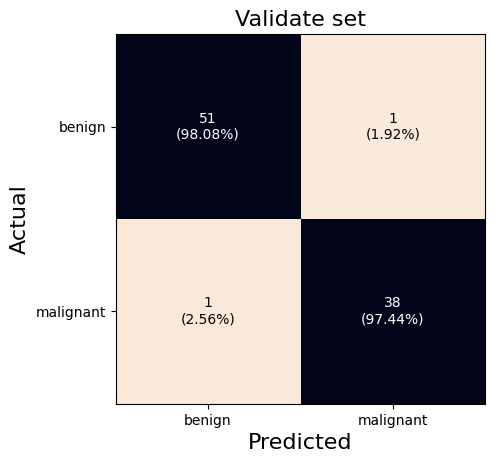

################# test set ##################
Confusion Matrix
----------------
[[46  0]
 [ 2 66]] 

----------------
split1
Sensitivity: 97.06%
Specificity: 100.00%
Accuracy: 98.25%
Precision: 100.00%
Sensitivity: 97.06%
Precision: 100.00%
F1: 98.51%


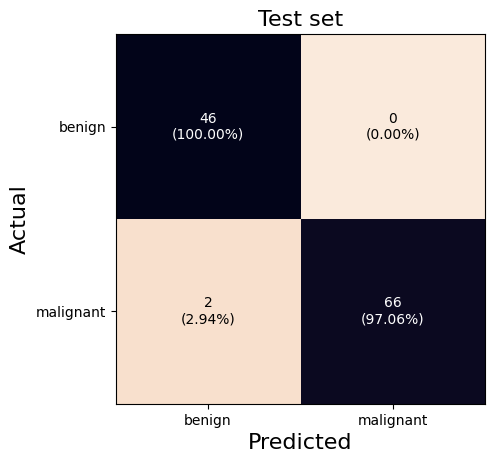

---------------------------------------
AUC validate: 0.9776
AUC test: 0.9853


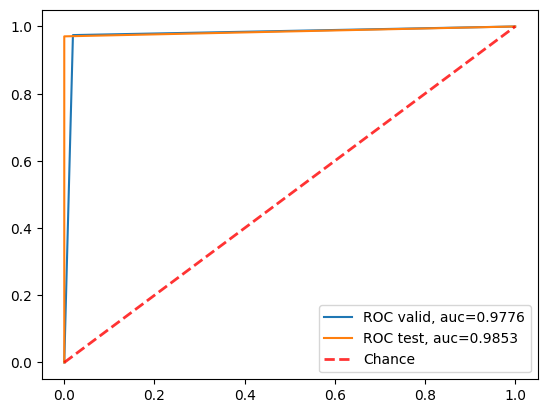

In [20]:
# param = 2
# param2_split1_cm_val, param2_split1_cm_test, param2_split1_AUC_val, param2_split1_AUC_test = evaluate(param,split)

## param3 split1

############## validate set ################
Confusion Matrix
----------------
[[51  1]
 [ 3 36]] 

----------------
split1
Sensitivity: 92.31%
Specificity: 98.08%
Accuracy: 95.60%
Precision: 97.30%
Sensitivity: 92.31%
Precision: 97.30%
F1: 94.74%


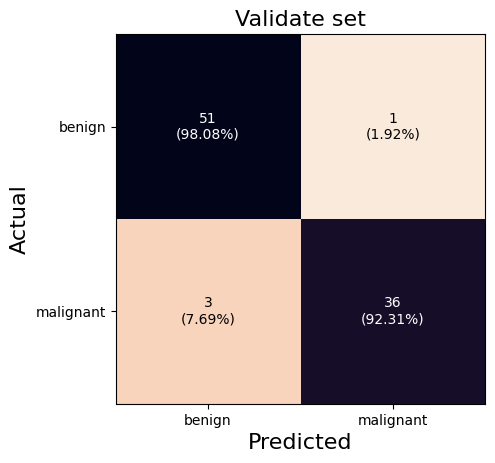

################# test set ##################
Confusion Matrix
----------------
[[45  1]
 [ 6 62]] 

----------------
split1
Sensitivity: 91.18%
Specificity: 97.83%
Accuracy: 93.86%
Precision: 98.41%
Sensitivity: 91.18%
Precision: 98.41%
F1: 94.66%


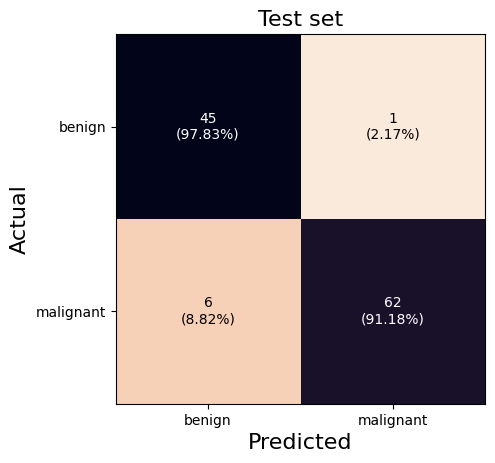

---------------------------------------
AUC validate: 0.9519
AUC test: 0.9450


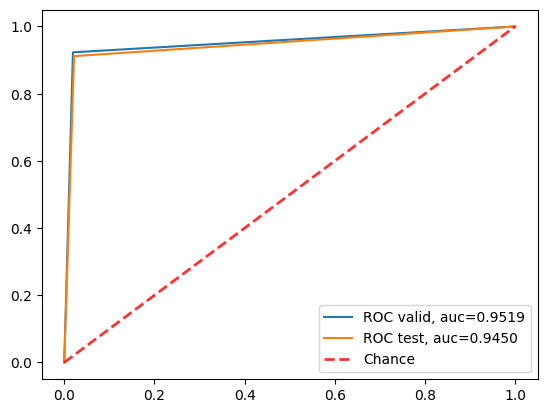

In [9]:
# param = 3
# param3_split1_cm_val, param3_split1_cm_test, param3_split1_AUC_val, param3_split1_AUC_test = evaluate(param,split)

## param4 split1

############## validate set ################
Confusion Matrix
----------------
[[51  1]
 [ 4 35]] 

----------------
split1
Sensitivity: 89.74%
Specificity: 98.08%
Accuracy: 94.51%
Precision: 97.22%
Sensitivity: 89.74%
Precision: 97.22%
F1: 93.33%


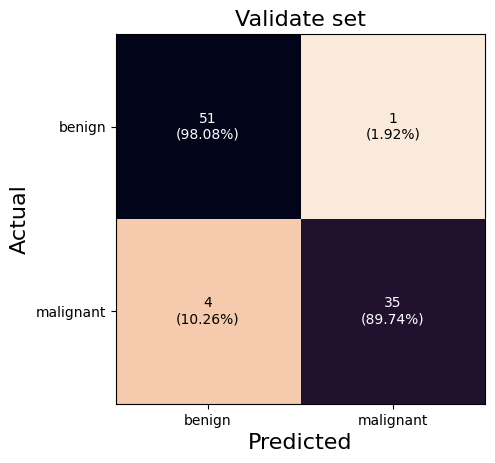

################# test set ##################
Confusion Matrix
----------------
[[45  1]
 [ 6 62]] 

----------------
split1
Sensitivity: 91.18%
Specificity: 97.83%
Accuracy: 93.86%
Precision: 98.41%
Sensitivity: 91.18%
Precision: 98.41%
F1: 94.66%


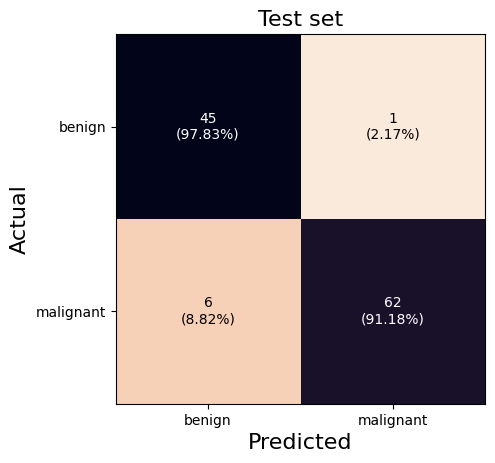

---------------------------------------
AUC validate: 0.9391
AUC test: 0.9450


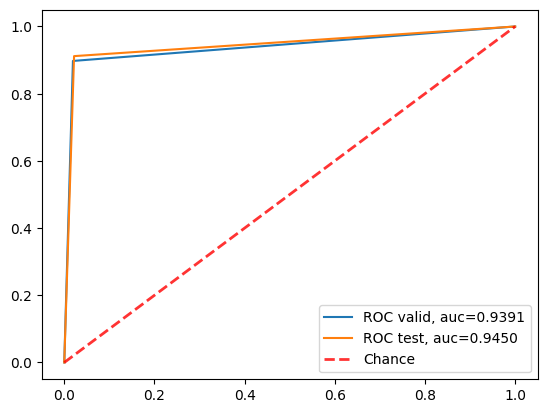

In [10]:
# param = 4
# param4_split1_cm_val, param4_split1_cm_test, param4_split1_AUC_val, param4_split1_AUC_test = evaluate(param,split)

## param5 split1

############## validate set ################
Confusion Matrix
----------------
[[51  1]
 [ 4 35]] 

----------------
split1
Sensitivity: 89.74%
Specificity: 98.08%
Accuracy: 94.51%
Precision: 97.22%
Sensitivity: 89.74%
Precision: 97.22%
F1: 93.33%


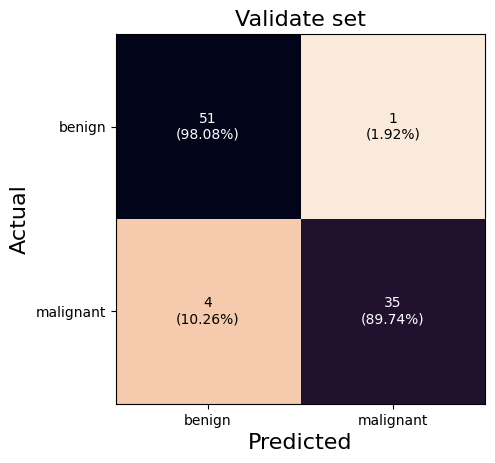

################# test set ##################
Confusion Matrix
----------------
[[45  1]
 [ 6 62]] 

----------------
split1
Sensitivity: 91.18%
Specificity: 97.83%
Accuracy: 93.86%
Precision: 98.41%
Sensitivity: 91.18%
Precision: 98.41%
F1: 94.66%


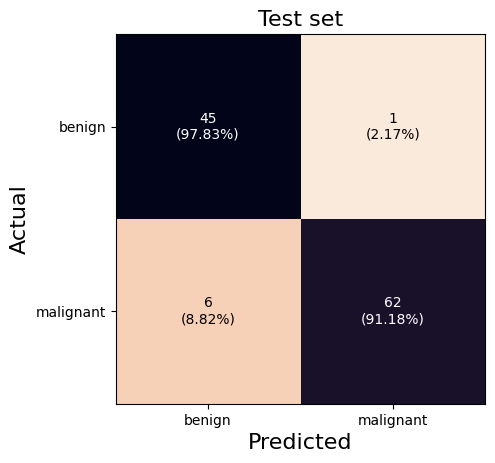

---------------------------------------
AUC validate: 0.9391
AUC test: 0.9450


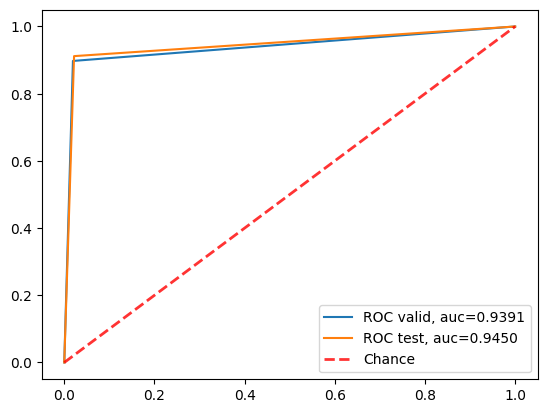

In [11]:
# param = 5
# param5_split1_cm_val, param5_split1_cm_test, param5_split1_AUC_val, param5_split1_AUC_test = evaluate(param,split)

# Setting Split 2

In [11]:
split_num = 2
split = "split{}".format(split_num)
x_train,y_train,x_test,y_test,x_val,y_val = setup(split)

../Anny_oversampling/DATA//split2/train/oversampled_train_split2.csv
(516, 32)
(516, 30)
['B' 'M']
../Anny_oversampling/DATA//test.csv
(114, 33)
(114, 30)
['B' 'M']
../Anny_oversampling/DATA//split2/val/val_split2.csv
(91, 32)
(91, 30)
['B' 'M']


## param1 split2

############## validate set ################
Confusion Matrix
----------------
[[53  0]
 [ 4 34]] 

----------------
split2
Sensitivity: 89.47%
Specificity: 100.00%
Accuracy: 95.60%
Precision: 100.00%
Sensitivity: 89.47%
Precision: 100.00%
F1: 94.44%


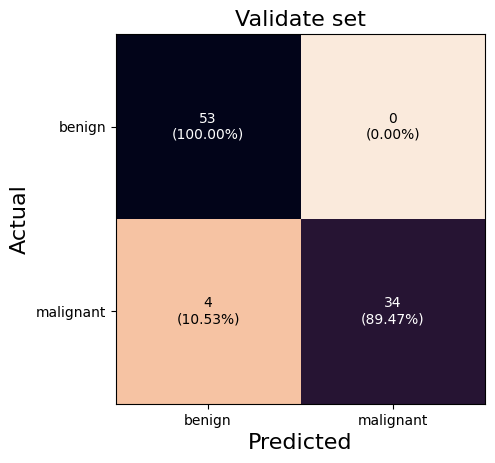

################# test set ##################
Confusion Matrix
----------------
[[46  0]
 [ 2 66]] 

----------------
split2
Sensitivity: 97.06%
Specificity: 100.00%
Accuracy: 98.25%
Precision: 100.00%
Sensitivity: 97.06%
Precision: 100.00%
F1: 98.51%


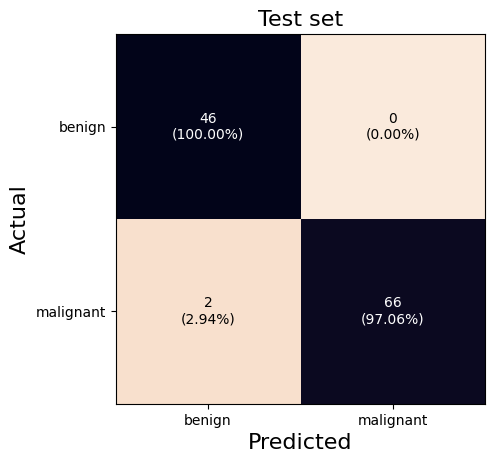

---------------------------------------
AUC validate: 0.9474
AUC test: 0.9853


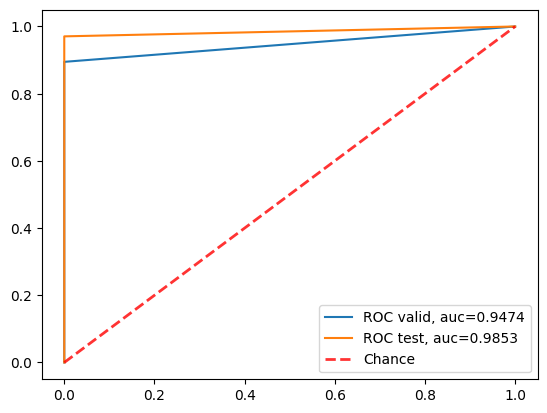

In [12]:
param = 1
param1_split2_cm_val, param1_split2_cm_test, param1_split2_AUC_val, param1_split2_AUC_test = evaluate(param,split)

## param2 split2

############## validate set ################
Confusion Matrix
----------------
[[53  0]
 [ 2 36]] 

----------------
split2
Sensitivity: 94.74%
Specificity: 100.00%
Accuracy: 97.80%
Precision: 100.00%
Sensitivity: 94.74%
Precision: 100.00%
F1: 97.30%


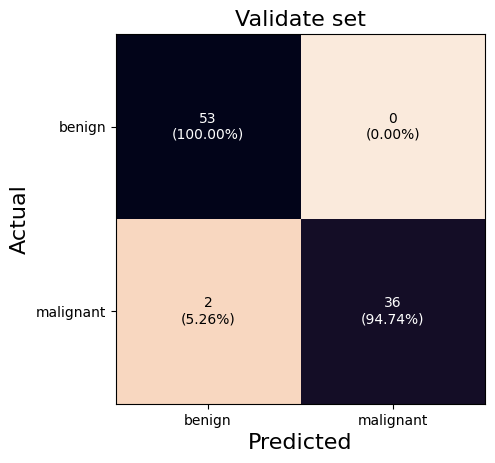

################# test set ##################
Confusion Matrix
----------------
[[45  1]
 [ 8 60]] 

----------------
split2
Sensitivity: 88.24%
Specificity: 97.83%
Accuracy: 92.11%
Precision: 98.36%
Sensitivity: 88.24%
Precision: 98.36%
F1: 93.02%


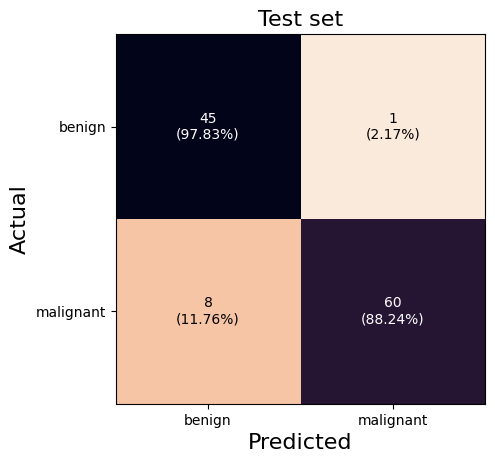

---------------------------------------
AUC validate: 0.9737
AUC test: 0.9303


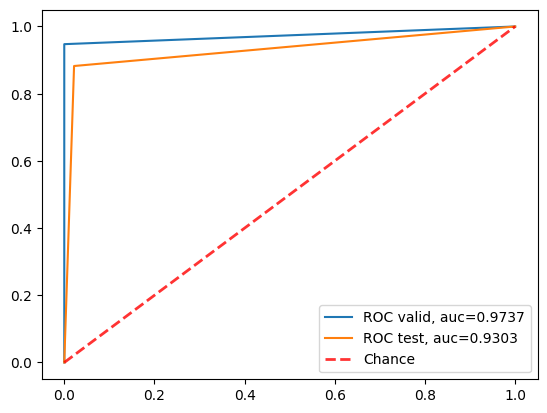

In [14]:
param = 2
param2_split2_cm_val, param2_split2_cm_test, param2_split2_AUC_val, param2_split2_AUC_test = evaluate(param,split)

## param3 split2

############## validate set ################
Confusion Matrix
----------------
[[53  0]
 [ 3 35]] 

----------------
split2
Sensitivity: 92.11%
Specificity: 100.00%
Accuracy: 96.70%
Precision: 100.00%
Sensitivity: 92.11%
Precision: 100.00%
F1: 95.89%


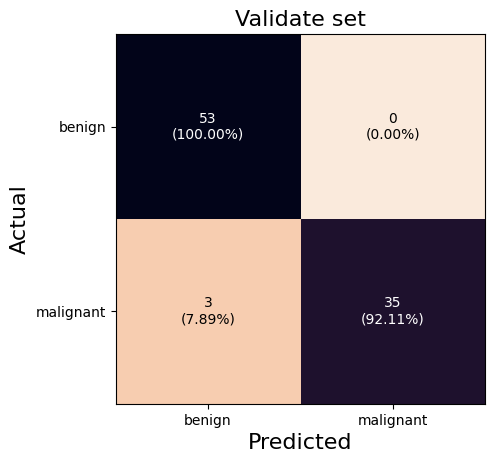

################# test set ##################
Confusion Matrix
----------------
[[46  0]
 [ 6 62]] 

----------------
split2
Sensitivity: 91.18%
Specificity: 100.00%
Accuracy: 94.74%
Precision: 100.00%
Sensitivity: 91.18%
Precision: 100.00%
F1: 95.38%


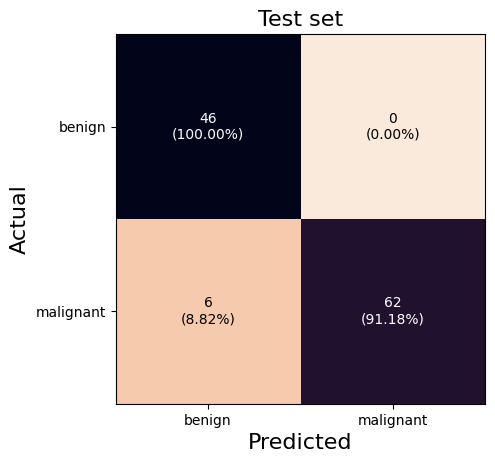

---------------------------------------
AUC validate: 0.9605
AUC test: 0.9559


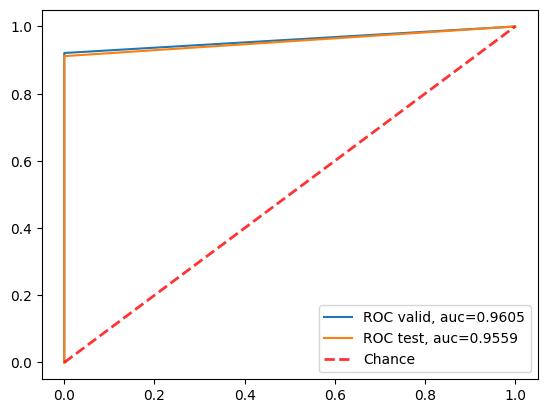

In [15]:
param = 3
param3_split2_cm_val, param3_split2_cm_test, param3_split2_AUC_val, param3_split2_AUC_test = evaluate(param,split)

## param4 split2

############## validate set ################
Confusion Matrix
----------------
[[53  0]
 [ 4 34]] 

----------------
split2
Sensitivity: 89.47%
Specificity: 100.00%
Accuracy: 95.60%
Precision: 100.00%
Sensitivity: 89.47%
Precision: 100.00%
F1: 94.44%


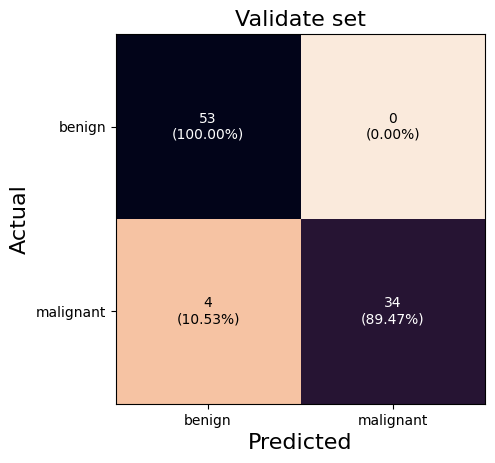

################# test set ##################
Confusion Matrix
----------------
[[46  0]
 [10 58]] 

----------------
split2
Sensitivity: 85.29%
Specificity: 100.00%
Accuracy: 91.23%
Precision: 100.00%
Sensitivity: 85.29%
Precision: 100.00%
F1: 92.06%


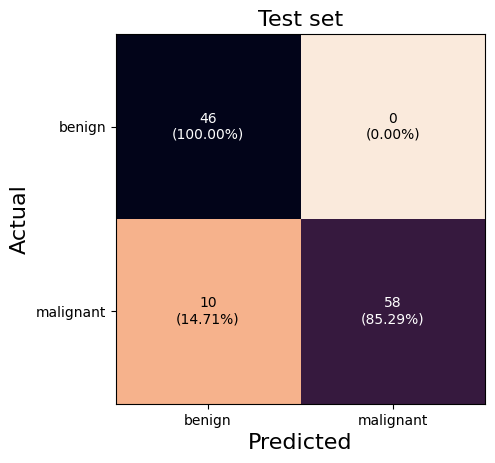

---------------------------------------
AUC validate: 0.9474
AUC test: 0.9265


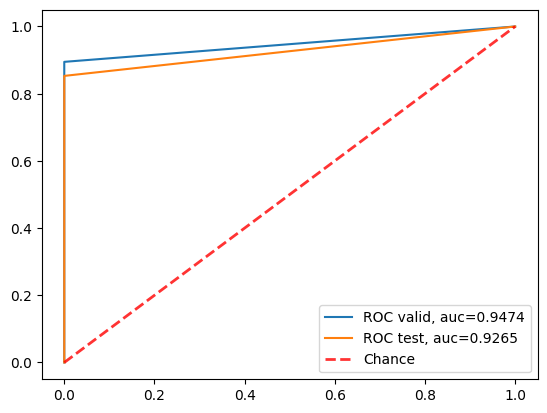

In [16]:
param = 4
param4_split2_cm_val, param4_split2_cm_test, param4_split2_AUC_val, param4_split2_AUC_test = evaluate(param,split)

## param5 split2

############## validate set ################
Confusion Matrix
----------------
[[53  0]
 [ 4 34]] 

----------------
split2
Sensitivity: 89.47%
Specificity: 100.00%
Accuracy: 95.60%
Precision: 100.00%
Sensitivity: 89.47%
Precision: 100.00%
F1: 94.44%


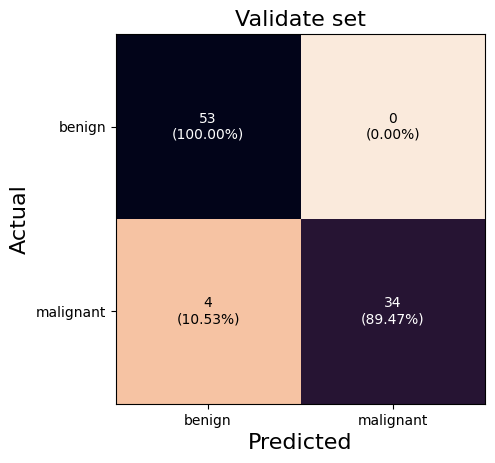

################# test set ##################
Confusion Matrix
----------------
[[46  0]
 [ 9 59]] 

----------------
split2
Sensitivity: 86.76%
Specificity: 100.00%
Accuracy: 92.11%
Precision: 100.00%
Sensitivity: 86.76%
Precision: 100.00%
F1: 92.91%


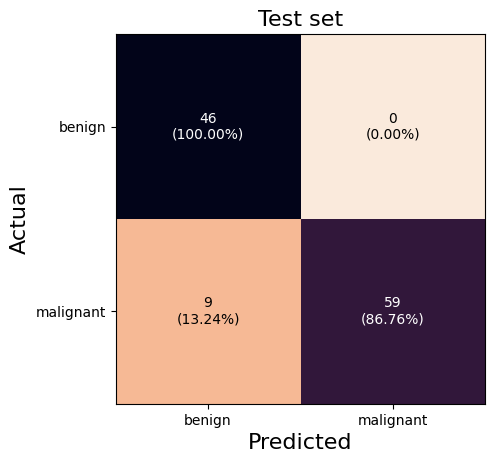

---------------------------------------
AUC validate: 0.9474
AUC test: 0.9338


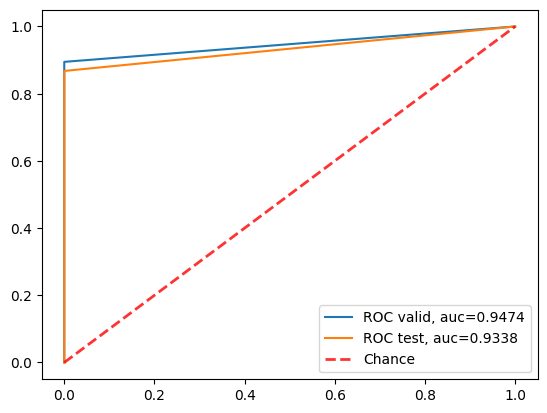

In [17]:
param = 5
param5_split2_cm_val, param5_split2_cm_test, param5_split2_AUC_val, param5_split2_AUC_test = evaluate(param,split)

# Setting Split 3

In [13]:
split_num = 3
split = "split{}".format(split_num)
x_train,y_train,x_test,y_test,x_val,y_val = setup(split)

../Anny_oversampling/DATA//split3/train/oversampled_train_split3.csv
(490, 32)
(490, 30)
['B' 'M']
../Anny_oversampling/DATA//test.csv
(114, 33)
(114, 30)
['B' 'M']
../Anny_oversampling/DATA//split3/val/val_split3.csv
(91, 32)
(91, 30)
['B' 'M']


## param1 split3

############## validate set ################
Confusion Matrix
----------------
[[65  1]
 [ 1 24]] 

----------------
split3
Sensitivity: 96.00%
Specificity: 98.48%
Accuracy: 97.80%
Precision: 96.00%
Sensitivity: 96.00%
Precision: 96.00%
F1: 96.00%


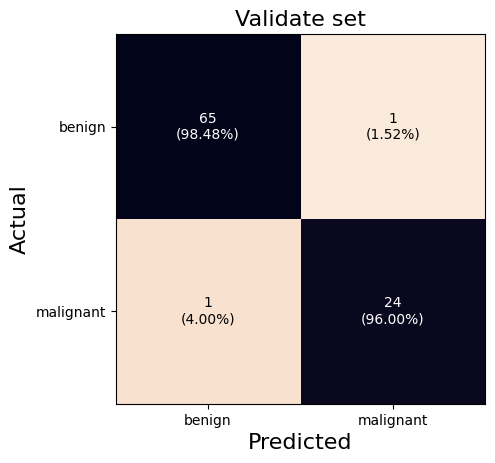

################# test set ##################
Confusion Matrix
----------------
[[45  1]
 [ 4 64]] 

----------------
split3
Sensitivity: 94.12%
Specificity: 97.83%
Accuracy: 95.61%
Precision: 98.46%
Sensitivity: 94.12%
Precision: 98.46%
F1: 96.24%


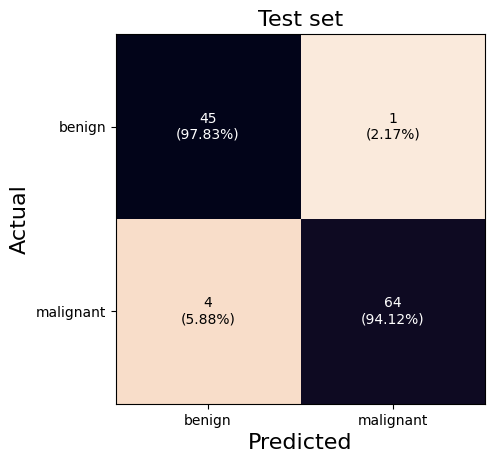

---------------------------------------
AUC validate: 0.9724
AUC test: 0.9597


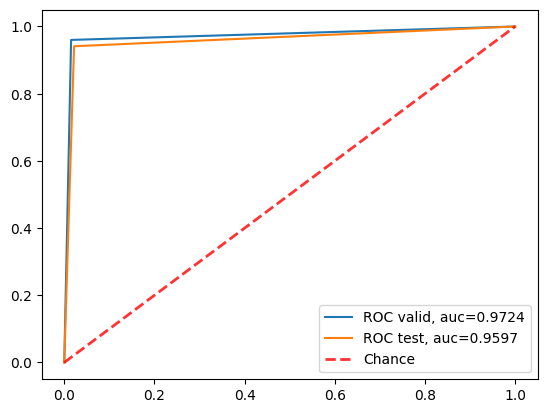

In [14]:
param = 1
param1_split3_cm_val, param1_split3_cm_test, param1_split3_AUC_val, param1_split3_AUC_test = evaluate(param,split)

## param2 split3

############## validate set ################
Confusion Matrix
----------------
[[65  1]
 [ 2 23]] 

----------------
split3
Sensitivity: 92.00%
Specificity: 98.48%
Accuracy: 96.70%
Precision: 95.83%
Sensitivity: 92.00%
Precision: 95.83%
F1: 93.88%


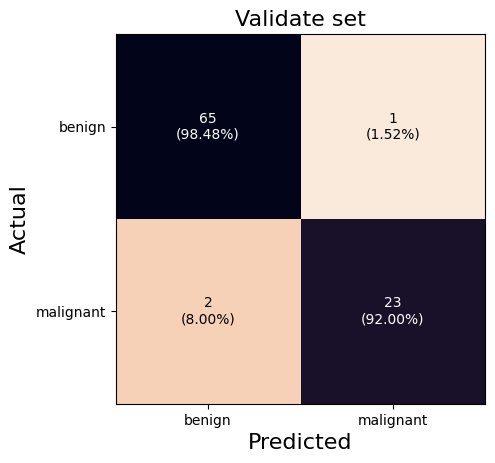

################# test set ##################
Confusion Matrix
----------------
[[44  2]
 [10 58]] 

----------------
split3
Sensitivity: 85.29%
Specificity: 95.65%
Accuracy: 89.47%
Precision: 96.67%
Sensitivity: 85.29%
Precision: 96.67%
F1: 90.62%


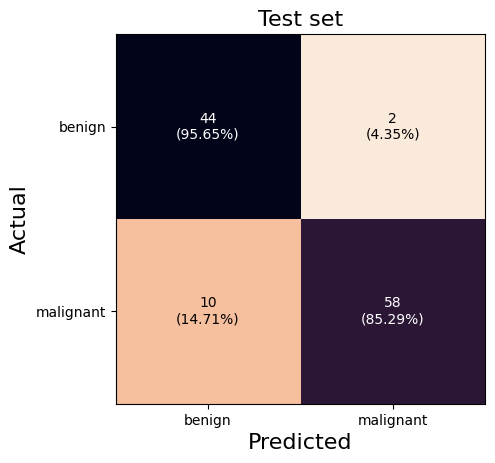

---------------------------------------
AUC validate: 0.9524
AUC test: 0.9047


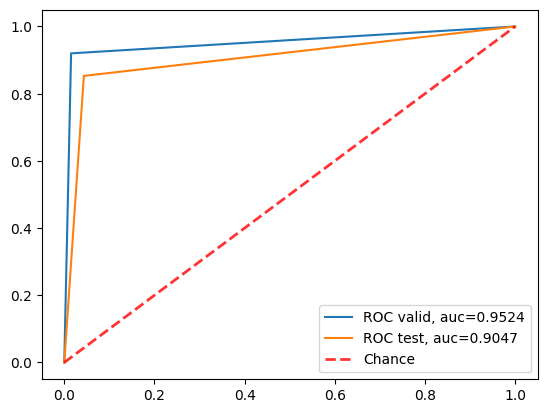

In [20]:
param = 2
param2_split3_cm_val, param2_split3_cm_test, param2_split3_AUC_val, param2_split3_AUC_test = evaluate(param,split)

## param3 split3

############## validate set ################
Confusion Matrix
----------------
[[65  1]
 [ 2 23]] 

----------------
split3
Sensitivity: 92.00%
Specificity: 98.48%
Accuracy: 96.70%
Precision: 95.83%
Sensitivity: 92.00%
Precision: 95.83%
F1: 93.88%


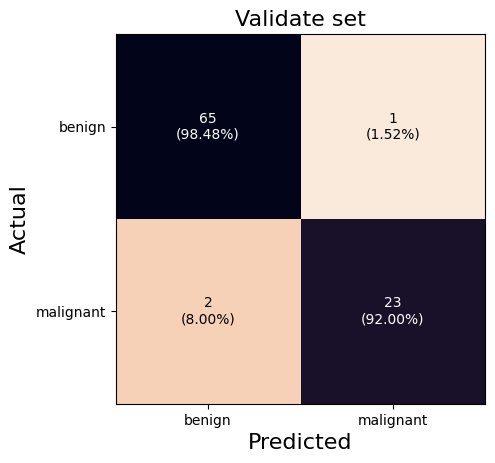

################# test set ##################
Confusion Matrix
----------------
[[45  1]
 [ 9 59]] 

----------------
split3
Sensitivity: 86.76%
Specificity: 97.83%
Accuracy: 91.23%
Precision: 98.33%
Sensitivity: 86.76%
Precision: 98.33%
F1: 92.19%


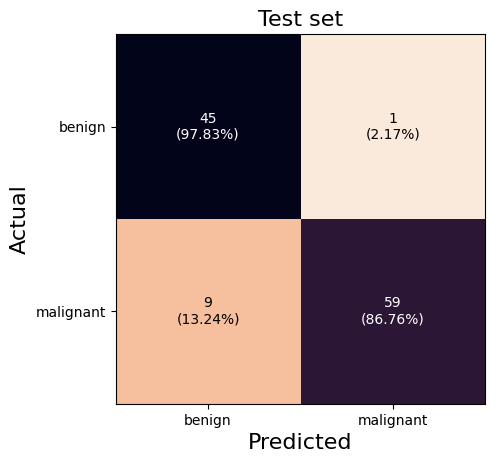

---------------------------------------
AUC validate: 0.9524
AUC test: 0.9230


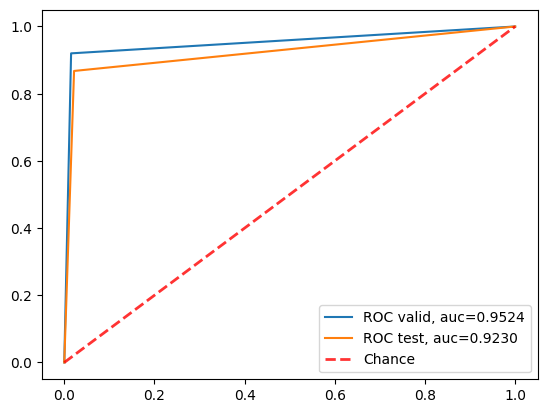

In [21]:
param = 3
param3_split3_cm_val, param3_split3_cm_test, param3_split3_AUC_val, param3_split3_AUC_test = evaluate(param,split)

## param4 split3

############## validate set ################
Confusion Matrix
----------------
[[65  1]
 [ 2 23]] 

----------------
split3
Sensitivity: 92.00%
Specificity: 98.48%
Accuracy: 96.70%
Precision: 95.83%
Sensitivity: 92.00%
Precision: 95.83%
F1: 93.88%


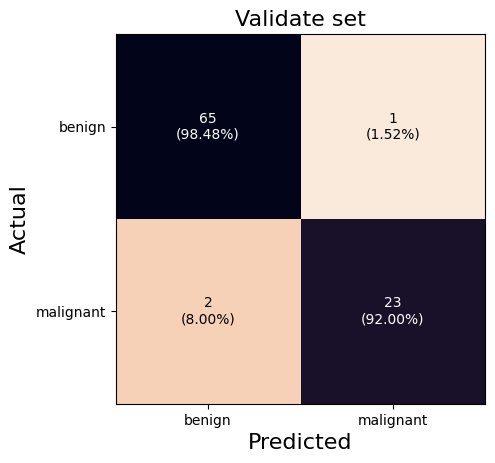

################# test set ##################
Confusion Matrix
----------------
[[45  1]
 [10 58]] 

----------------
split3
Sensitivity: 85.29%
Specificity: 97.83%
Accuracy: 90.35%
Precision: 98.31%
Sensitivity: 85.29%
Precision: 98.31%
F1: 91.34%


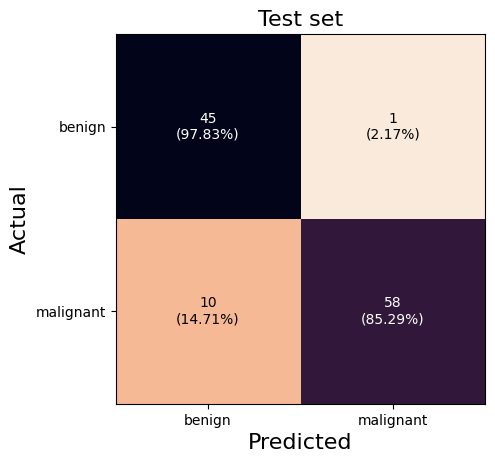

---------------------------------------
AUC validate: 0.9524
AUC test: 0.9156


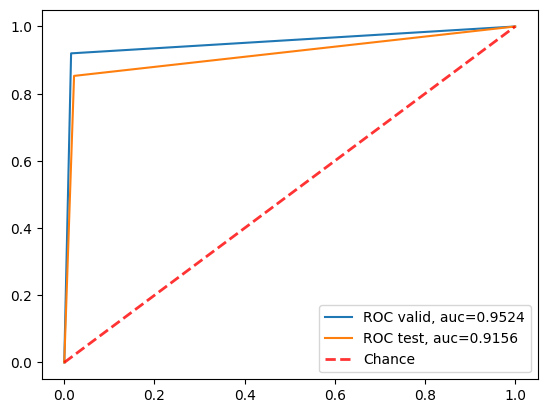

In [22]:
param = 4
param4_split3_cm_val, param4_split3_cm_test, param4_split3_AUC_val, param4_split3_AUC_test = evaluate(param,split)

## param5 split3

############## validate set ################
Confusion Matrix
----------------
[[65  1]
 [ 2 23]] 

----------------
split3
Sensitivity: 92.00%
Specificity: 98.48%
Accuracy: 96.70%
Precision: 95.83%
Sensitivity: 92.00%
Precision: 95.83%
F1: 93.88%


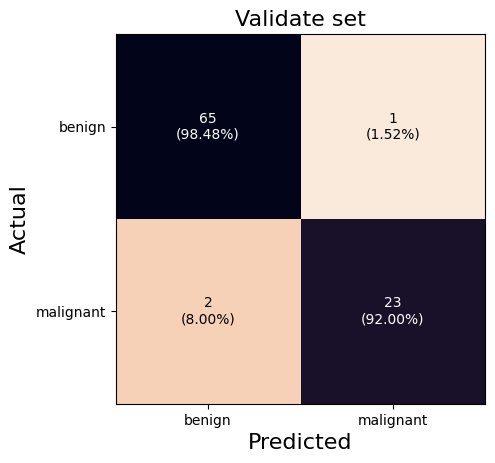

################# test set ##################
Confusion Matrix
----------------
[[45  1]
 [ 6 62]] 

----------------
split3
Sensitivity: 91.18%
Specificity: 97.83%
Accuracy: 93.86%
Precision: 98.41%
Sensitivity: 91.18%
Precision: 98.41%
F1: 94.66%


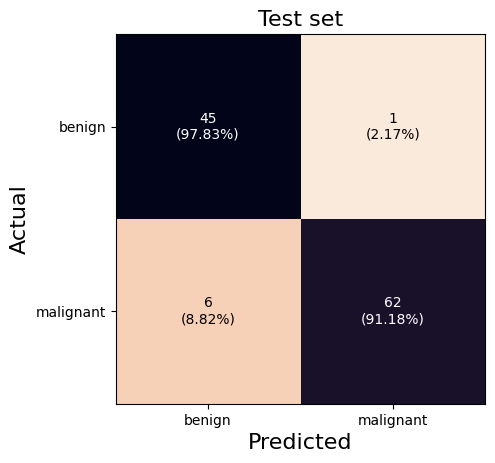

---------------------------------------
AUC validate: 0.9524
AUC test: 0.9450


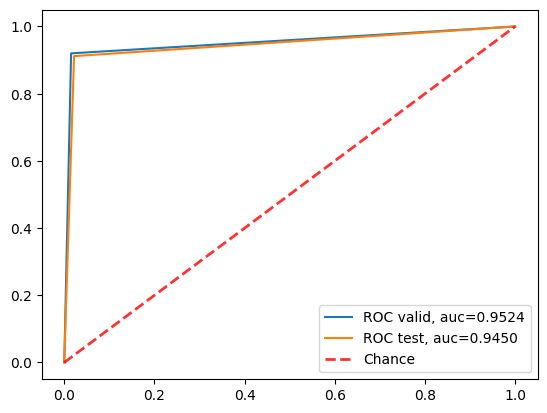

In [23]:
param = 5
param5_split3_cm_val, param5_split3_cm_test, param5_split3_AUC_val, param5_split3_AUC_test = evaluate(param,split)

# Setting Split 4

In [15]:
split_num = 4
split = "split{}".format(split_num)
x_train,y_train,x_test,y_test,x_val,y_val = setup(split)

../Anny_oversampling/DATA//split4/train/oversampled_train_split4.csv
(478, 32)
(478, 30)
['B' 'M']
../Anny_oversampling/DATA//test.csv
(114, 33)
(114, 30)
['B' 'M']
../Anny_oversampling/DATA//split4/val/val_split4.csv
(91, 32)
(91, 30)
['B' 'M']


## param1 split4

############## validate set ################
Confusion Matrix
----------------
[[72  0]
 [ 0 19]] 

----------------
split4
Sensitivity: 100.00%
Specificity: 100.00%
Accuracy: 100.00%
Precision: 100.00%
Sensitivity: 100.00%
Precision: 100.00%
F1: 100.00%


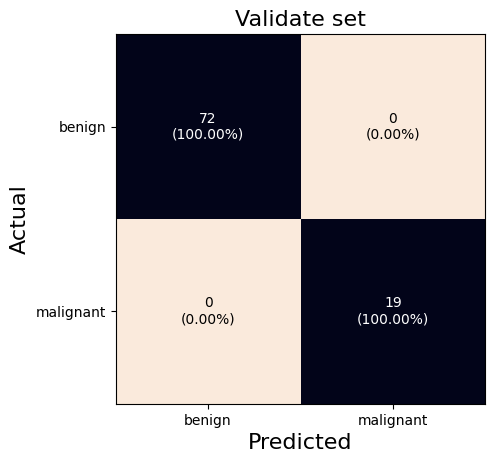

################# test set ##################
Confusion Matrix
----------------
[[44  2]
 [ 2 66]] 

----------------
split4
Sensitivity: 97.06%
Specificity: 95.65%
Accuracy: 96.49%
Precision: 97.06%
Sensitivity: 97.06%
Precision: 97.06%
F1: 97.06%


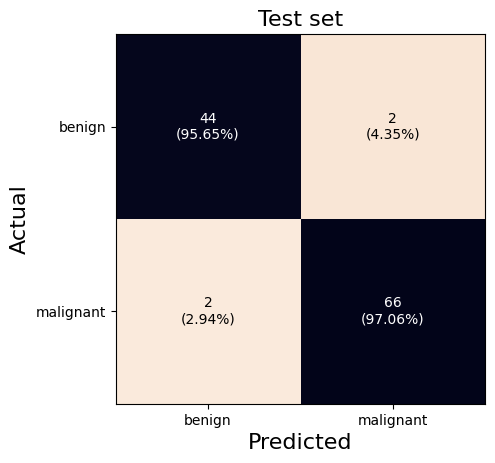

---------------------------------------
AUC validate: 1.0000
AUC test: 0.9636


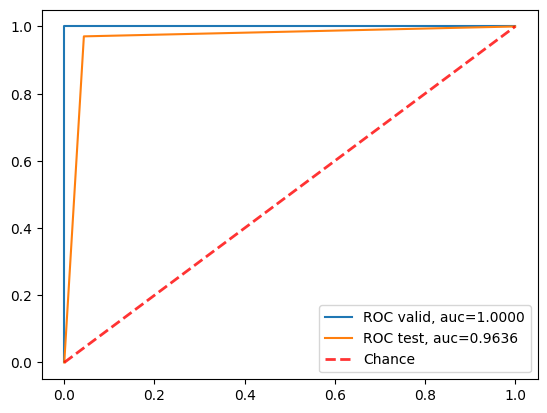

In [16]:
param = 1
param1_split4_cm_val, param1_split4_cm_test, param1_split4_AUC_val, param1_split4_AUC_test = evaluate(param,split)

## param2 split4

############## validate set ################
Confusion Matrix
----------------
[[71  1]
 [ 1 18]] 

----------------
split4
Sensitivity: 94.74%
Specificity: 98.61%
Accuracy: 97.80%
Precision: 94.74%
Sensitivity: 94.74%
Precision: 94.74%
F1: 94.74%


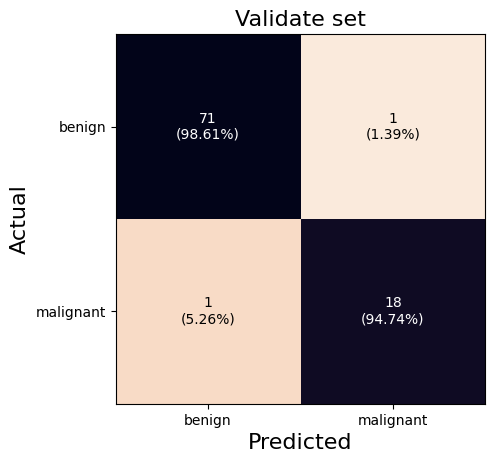

################# test set ##################
Confusion Matrix
----------------
[[44  2]
 [ 6 62]] 

----------------
split4
Sensitivity: 91.18%
Specificity: 95.65%
Accuracy: 92.98%
Precision: 96.88%
Sensitivity: 91.18%
Precision: 96.88%
F1: 93.94%


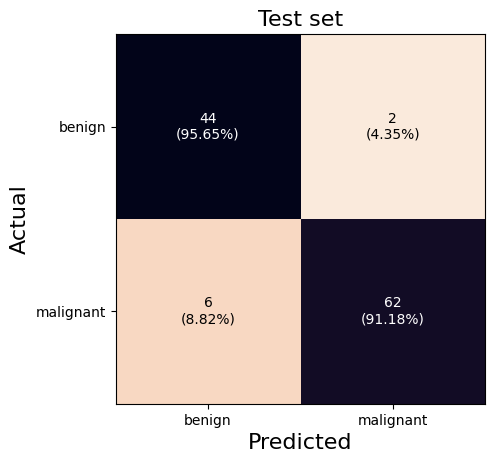

---------------------------------------
AUC validate: 0.9667
AUC test: 0.9341


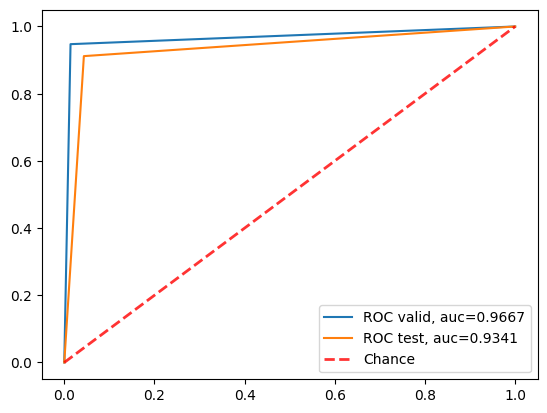

In [26]:
param = 2
param2_split4_cm_val, param2_split4_cm_test, param2_split4_AUC_val, param2_split4_AUC_test = evaluate(param,split)

## param3 split4

############## validate set ################
Confusion Matrix
----------------
[[72  0]
 [ 1 18]] 

----------------
split4
Sensitivity: 94.74%
Specificity: 100.00%
Accuracy: 98.90%
Precision: 100.00%
Sensitivity: 94.74%
Precision: 100.00%
F1: 97.30%


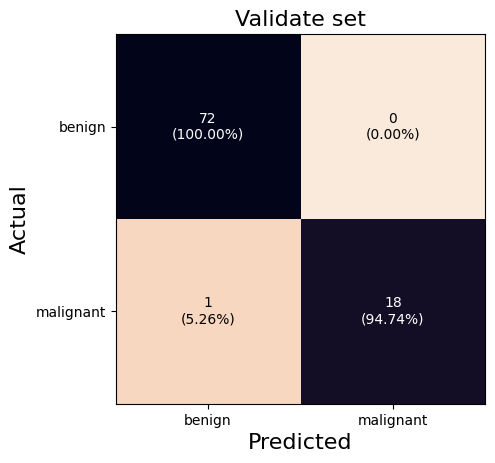

################# test set ##################
Confusion Matrix
----------------
[[44  2]
 [ 8 60]] 

----------------
split4
Sensitivity: 88.24%
Specificity: 95.65%
Accuracy: 91.23%
Precision: 96.77%
Sensitivity: 88.24%
Precision: 96.77%
F1: 92.31%


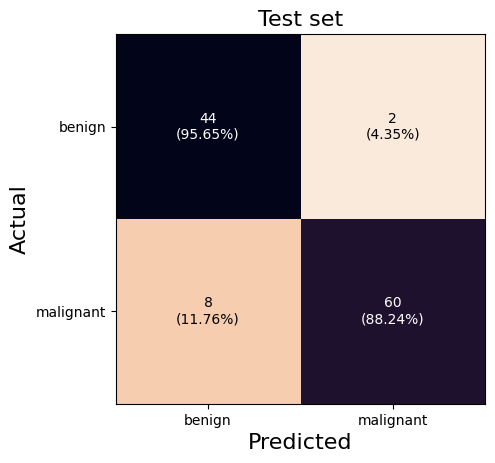

---------------------------------------
AUC validate: 0.9737
AUC test: 0.9194


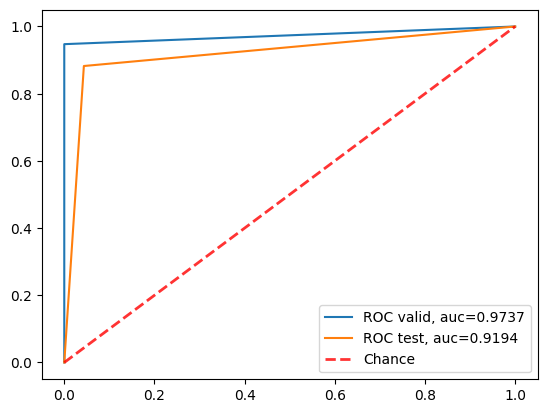

In [27]:
param = 3
param3_split4_cm_val, param3_split4_cm_test, param3_split4_AUC_val, param3_split4_AUC_test = evaluate(param,split)

## param4 split4

############## validate set ################
Confusion Matrix
----------------
[[70  2]
 [ 1 18]] 

----------------
split4
Sensitivity: 94.74%
Specificity: 97.22%
Accuracy: 96.70%
Precision: 90.00%
Sensitivity: 94.74%
Precision: 90.00%
F1: 92.31%


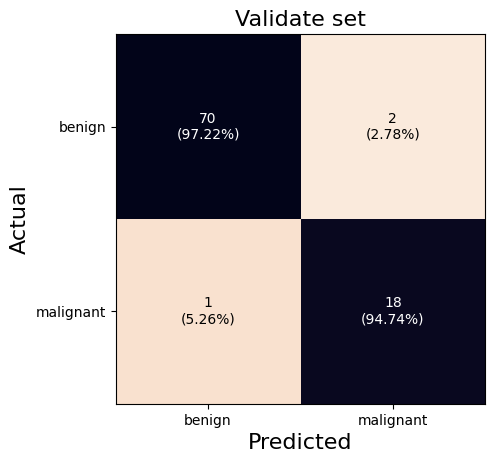

################# test set ##################
Confusion Matrix
----------------
[[44  2]
 [ 6 62]] 

----------------
split4
Sensitivity: 91.18%
Specificity: 95.65%
Accuracy: 92.98%
Precision: 96.88%
Sensitivity: 91.18%
Precision: 96.88%
F1: 93.94%


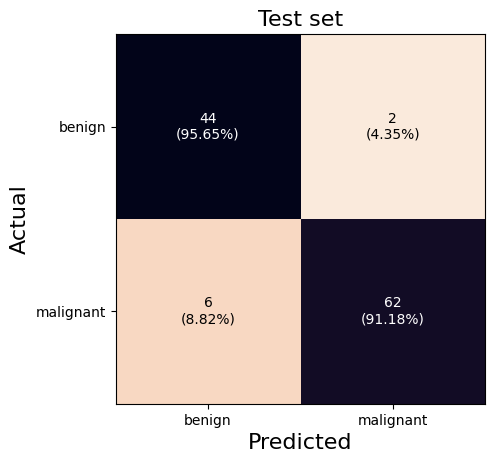

---------------------------------------
AUC validate: 0.9598
AUC test: 0.9341


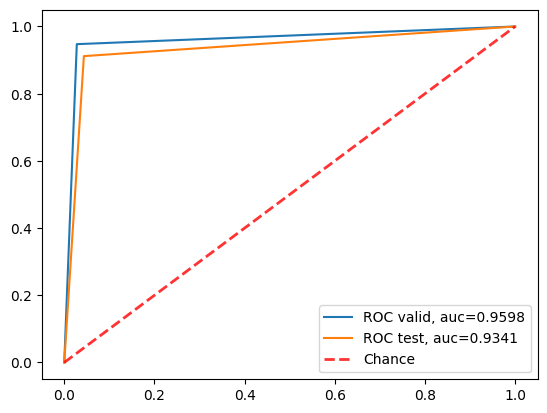

In [28]:
param = 4
param4_split4_cm_val, param4_split4_cm_test, param4_split4_AUC_val, param4_split4_AUC_test = evaluate(param,split)

## param5 split4

############## validate set ################
Confusion Matrix
----------------
[[72  0]
 [ 1 18]] 

----------------
split4
Sensitivity: 94.74%
Specificity: 100.00%
Accuracy: 98.90%
Precision: 100.00%
Sensitivity: 94.74%
Precision: 100.00%
F1: 97.30%


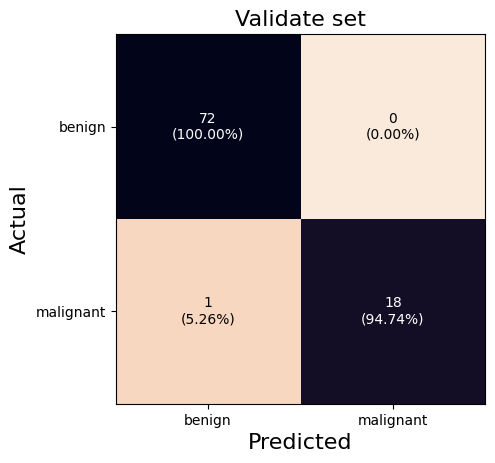

################# test set ##################
Confusion Matrix
----------------
[[45  1]
 [ 8 60]] 

----------------
split4
Sensitivity: 88.24%
Specificity: 97.83%
Accuracy: 92.11%
Precision: 98.36%
Sensitivity: 88.24%
Precision: 98.36%
F1: 93.02%


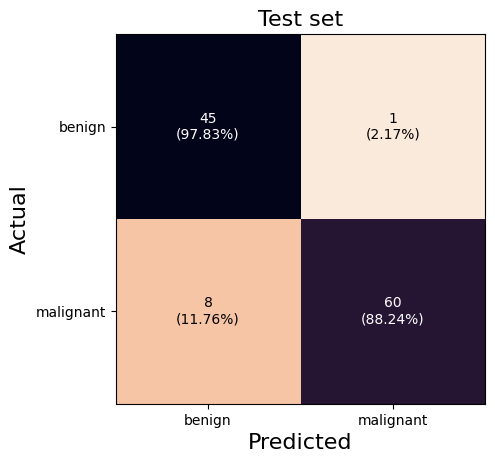

---------------------------------------
AUC validate: 0.9737
AUC test: 0.9303


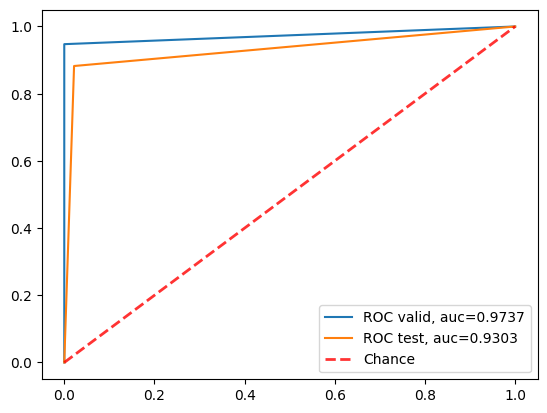

In [29]:
param = 5
param5_split4_cm_val, param5_split4_cm_test, param5_split4_AUC_val, param5_split4_AUC_test = evaluate(param,split)

# Setting Split 5

In [17]:
split_num = 5
split = "split{}".format(split_num)
x_train,y_train,x_test,y_test,x_val,y_val = setup(split)

../Anny_oversampling/DATA//split5/train/oversampled_train_split5.csv
(486, 32)
(486, 30)
['B' 'M']
../Anny_oversampling/DATA//test.csv
(114, 33)
(114, 30)
['B' 'M']
../Anny_oversampling/DATA//split5/val/val_split5.csv
(91, 32)
(91, 30)
['B' 'M']


## param1 split5

############## validate set ################
Confusion Matrix
----------------
[[67  1]
 [ 0 23]] 

----------------
split5
Sensitivity: 100.00%
Specificity: 98.53%
Accuracy: 98.90%
Precision: 95.83%
Sensitivity: 100.00%
Precision: 95.83%
F1: 97.87%


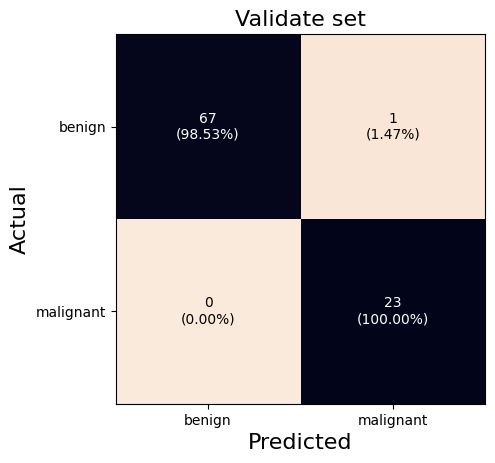

################# test set ##################
Confusion Matrix
----------------
[[45  1]
 [ 3 65]] 

----------------
split5
Sensitivity: 95.59%
Specificity: 97.83%
Accuracy: 96.49%
Precision: 98.48%
Sensitivity: 95.59%
Precision: 98.48%
F1: 97.01%


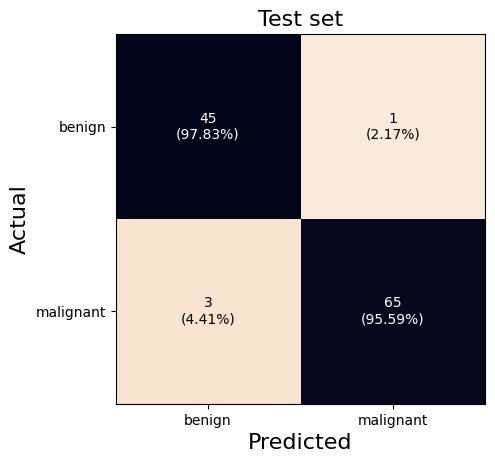

---------------------------------------
AUC validate: 0.9926
AUC test: 0.9671


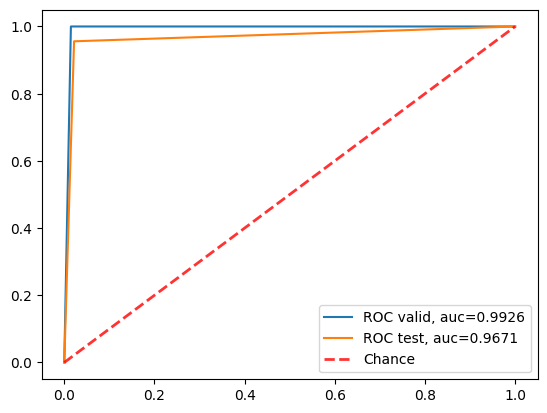

In [18]:
param = 1
param1_split5_cm_val, param1_split5_cm_test, param1_split5_AUC_val, param1_split5_AUC_test = evaluate(param,split)

## param2 split5

############## validate set ################
Confusion Matrix
----------------
[[66  2]
 [ 1 22]] 

----------------
split5
Sensitivity: 95.65%
Specificity: 97.06%
Accuracy: 96.70%
Precision: 91.67%
Sensitivity: 95.65%
Precision: 91.67%
F1: 93.62%


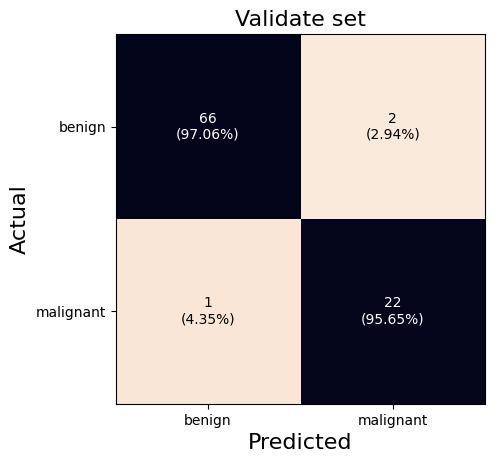

################# test set ##################
Confusion Matrix
----------------
[[45  1]
 [ 8 60]] 

----------------
split5
Sensitivity: 88.24%
Specificity: 97.83%
Accuracy: 92.11%
Precision: 98.36%
Sensitivity: 88.24%
Precision: 98.36%
F1: 93.02%


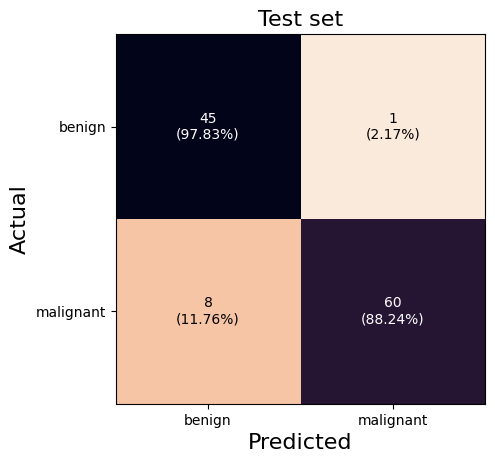

---------------------------------------
AUC validate: 0.9636
AUC test: 0.9303


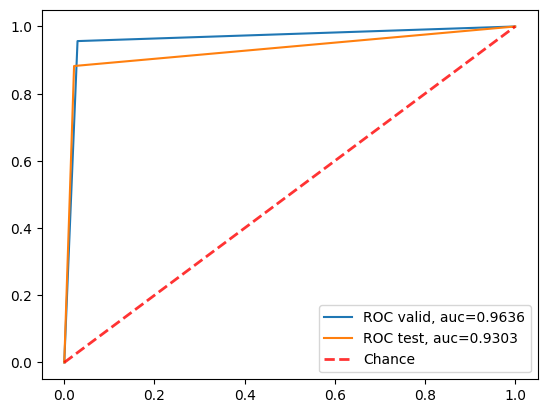

In [32]:
param = 2
param2_split5_cm_val, param2_split5_cm_test, param2_split5_AUC_val, param2_split5_AUC_test = evaluate(param,split)

## param3 split5

############## validate set ################
Confusion Matrix
----------------
[[67  1]
 [ 2 21]] 

----------------
split5
Sensitivity: 91.30%
Specificity: 98.53%
Accuracy: 96.70%
Precision: 95.45%
Sensitivity: 91.30%
Precision: 95.45%
F1: 93.33%


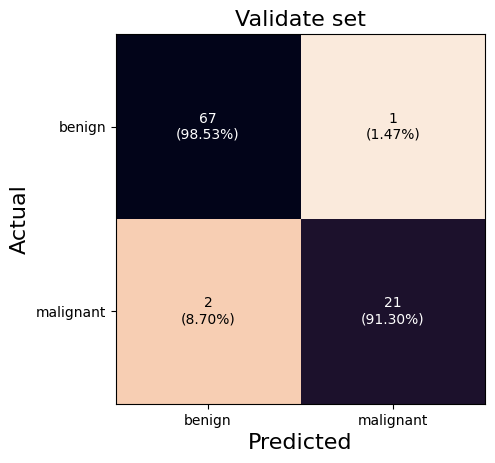

################# test set ##################
Confusion Matrix
----------------
[[45  1]
 [ 9 59]] 

----------------
split5
Sensitivity: 86.76%
Specificity: 97.83%
Accuracy: 91.23%
Precision: 98.33%
Sensitivity: 86.76%
Precision: 98.33%
F1: 92.19%


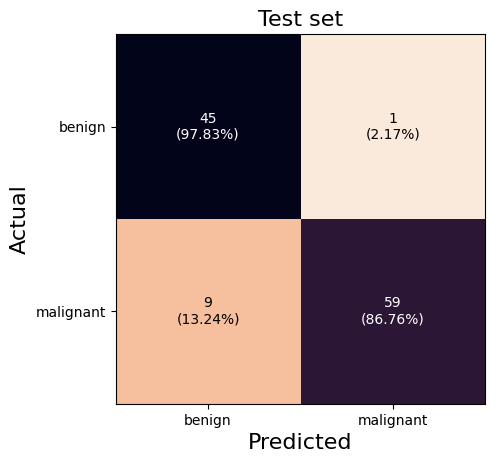

---------------------------------------
AUC validate: 0.9492
AUC test: 0.9230


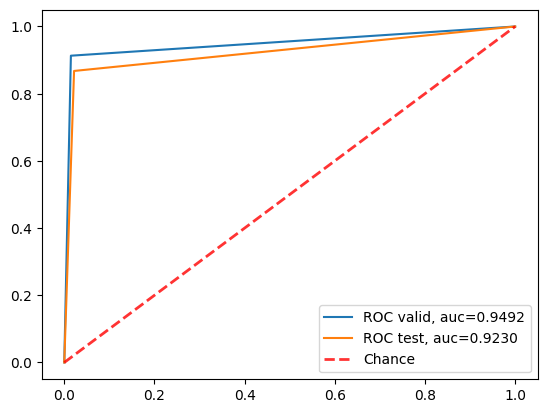

In [33]:
param = 3
param3_split5_cm_val, param3_split5_cm_test, param3_split5_AUC_val, param3_split5_AUC_test = evaluate(param,split)

## param4 split5

############## validate set ################
Confusion Matrix
----------------
[[67  1]
 [ 1 22]] 

----------------
split5
Sensitivity: 95.65%
Specificity: 98.53%
Accuracy: 97.80%
Precision: 95.65%
Sensitivity: 95.65%
Precision: 95.65%
F1: 95.65%


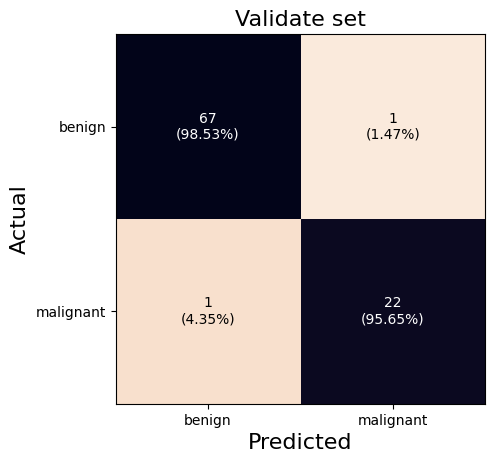

################# test set ##################
Confusion Matrix
----------------
[[44  2]
 [ 8 60]] 

----------------
split5
Sensitivity: 88.24%
Specificity: 95.65%
Accuracy: 91.23%
Precision: 96.77%
Sensitivity: 88.24%
Precision: 96.77%
F1: 92.31%


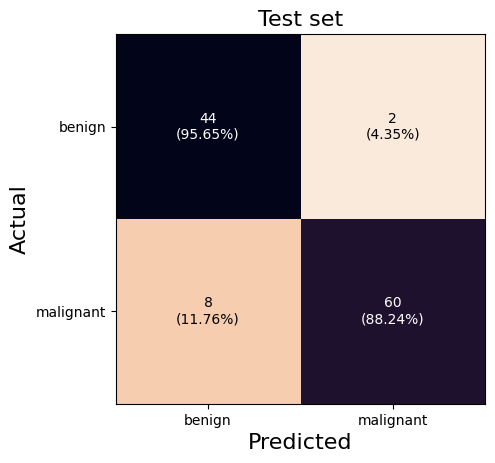

---------------------------------------
AUC validate: 0.9709
AUC test: 0.9194


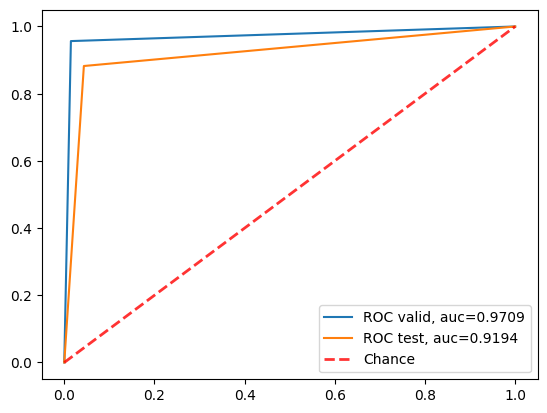

In [34]:
param = 4
param4_split5_cm_val, param4_split5_cm_test, param4_split5_AUC_val, param4_split5_AUC_test = evaluate(param,split)

## param5 split5

############## validate set ################
Confusion Matrix
----------------
[[67  1]
 [ 2 21]] 

----------------
split5
Sensitivity: 91.30%
Specificity: 98.53%
Accuracy: 96.70%
Precision: 95.45%
Sensitivity: 91.30%
Precision: 95.45%
F1: 93.33%


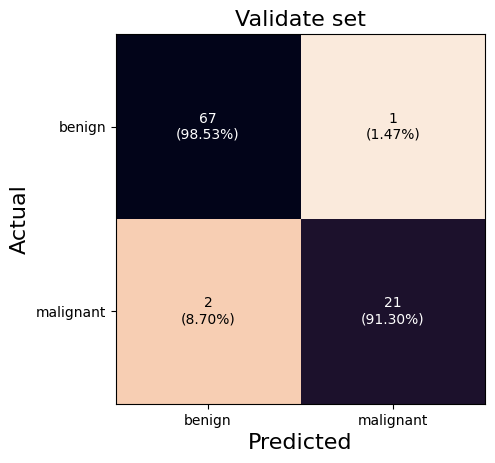

################# test set ##################
Confusion Matrix
----------------
[[45  1]
 [ 9 59]] 

----------------
split5
Sensitivity: 86.76%
Specificity: 97.83%
Accuracy: 91.23%
Precision: 98.33%
Sensitivity: 86.76%
Precision: 98.33%
F1: 92.19%


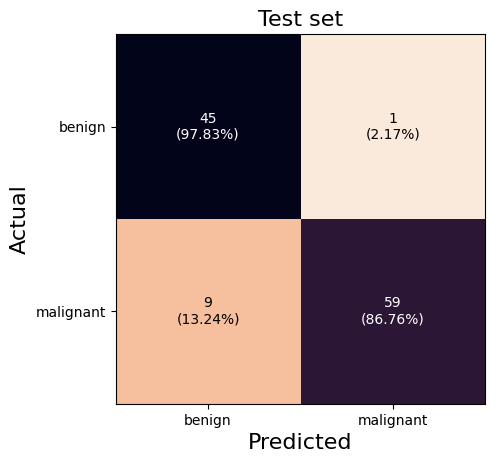

---------------------------------------
AUC validate: 0.9492
AUC test: 0.9230


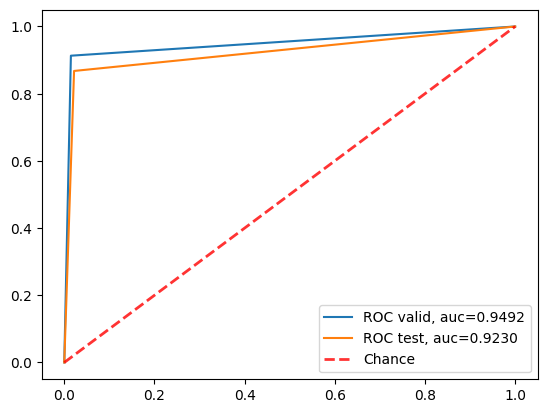

In [35]:
param = 5
param5_split5_cm_val, param5_split5_cm_test, param5_split5_AUC_val, param5_split5_AUC_test = evaluate(param,split)

# overall

In [20]:
def Mean_SD(name,split1, split2, split3, split4, split5):
    sensitivity_values = []
    sensitivity_values.append(split1)
    sensitivity_values.append(split2)
    sensitivity_values.append(split3)
    sensitivity_values.append(split4)
    sensitivity_values.append(split5)

    # calculating the mean of sample set
    mean_sensitivity = statistics.mean(sensitivity_values)
    # Calculate standard deviation of sensitivity
    sensitivity_sd = statistics.stdev(sensitivity_values)
    
    # Print mean sensitivity with standard deviation
    print("%s: %.2f ± %.2f%%" % (name,mean_sensitivity, sensitivity_sd))

In [21]:
def plot(split1_cm, split2_cm, split3_cm, split4_cm, split5_cm):
    cm_val = split1_cm + split2_cm + split3_cm + split4_cm + split5_cm
    # Calculate score
    print("split1")
    sen_val_1 = sensitivity(split1_cm)
    spec_val_1 = specificity(split1_cm)
    acc_val_1 = accuracy(split1_cm)
    pre_val_1 = precision(split1_cm)
    f1_score_val_1 = f1(split1_cm)
    print("\nsplit2")
    sen_val_2 = sensitivity(split2_cm)
    spec_val_2 = specificity(split2_cm)
    acc_val_2 = accuracy(split2_cm)
    pre_val_2 = precision(split2_cm)
    f1_score_val_2 = f1(split2_cm)
    print("\nsplit3")
    sen_val_3 = sensitivity(split3_cm)
    spec_val_3 = specificity(split3_cm)
    acc_val_3 = accuracy(split3_cm)
    pre_val_3 = precision(split3_cm)
    f1_score_val_3 = f1(split3_cm)
    print("\nsplit4")
    sen_val_4 = sensitivity(split4_cm)
    spec_val_4 = specificity(split4_cm)
    acc_val_4 = accuracy(split4_cm)
    pre_val_4 = precision(split4_cm)
    f1_score_val_4 = f1(split4_cm)
    print("\nsplit5")
    sen_val_5 = sensitivity(split5_cm)
    spec_val_5 = specificity(split5_cm)
    acc_val_5 = accuracy(split5_cm)
    pre_val_5 = precision(split5_cm)
    f1_score_val_5 = f1(split5_cm)
    print("\noverall")
    Mean_SD("sensitivity",sen_val_1, sen_val_2, sen_val_3, sen_val_4, sen_val_5)
    Mean_SD("specificity",spec_val_1, spec_val_2, spec_val_3, spec_val_4, spec_val_5)
    Mean_SD("accuracy",acc_val_1, acc_val_2, acc_val_3, acc_val_4, acc_val_5)
    Mean_SD("precision",pre_val_1, pre_val_2, pre_val_3, pre_val_4, pre_val_5)
    Mean_SD("f1_score",f1_score_val_1, f1_score_val_2, f1_score_val_3, f1_score_val_4, f1_score_val_5)
    # plot confusion matrix
    class_names = ['benign','malignant']
    # Normalize confusion matrix to percentage
    cm_norm_val = cm_val.astype('float') / cm_val.sum(axis=1)[:, np.newaxis]
    # Create plot
    fig, ax = plt.subplots()
    im = ax.imshow(cm_norm_val, interpolation='nearest', cmap="rocket_r")
    ax.grid(False)
    # Add labels
    ax.set(xticks=np.arange(cm_norm_val.shape[1]),
           yticks=np.arange(cm_norm_val.shape[0]),
           xticklabels=class_names, yticklabels=class_names)
    ax.set_title("Validate set", fontsize=16)
    ax.set_ylabel('Actual', fontsize=16)
    ax.set_xlabel('Predicted', fontsize=16)
    # Add percentage and count values inside plot
    thresh = cm_norm_val.max() / 2.
    for i in range(cm_norm_val.shape[0]):
        for j in range(cm_norm_val.shape[1]):
            ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_val[i,j], cm_norm_val[i, j]*100),
                    ha="center", va="center",
                    color="white" if cm_norm_val[i, j] > thresh else "black")
    # plt.savefig('rf_model/validate_cm_{}.png'.format(split))
    # plt.savefig('rf_model/validate_cm_best_param2_{}.png'.format(split))
    plt.show()

## overall param1

param1
split1
Sensitivity: 97.44%
Specificity: 98.08%
Accuracy: 97.80%
Precision: 97.44%
Sensitivity: 97.44%
Precision: 97.44%
F1: 97.44%

split2
Sensitivity: 89.47%
Specificity: 100.00%
Accuracy: 95.60%
Precision: 100.00%
Sensitivity: 89.47%
Precision: 100.00%
F1: 94.44%

split3
Sensitivity: 96.00%
Specificity: 98.48%
Accuracy: 97.80%
Precision: 96.00%
Sensitivity: 96.00%
Precision: 96.00%
F1: 96.00%

split4
Sensitivity: 100.00%
Specificity: 100.00%
Accuracy: 100.00%
Precision: 100.00%
Sensitivity: 100.00%
Precision: 100.00%
F1: 100.00%

split5
Sensitivity: 100.00%
Specificity: 98.53%
Accuracy: 98.90%
Precision: 95.83%
Sensitivity: 100.00%
Precision: 95.83%
F1: 97.87%

overall
sensitivity: 96.58 ± 4.33%
specificity: 99.02 ± 0.91%
accuracy: 98.02 ± 1.63%
precision: 97.85 ± 2.06%
f1_score: 97.15 ± 2.08%


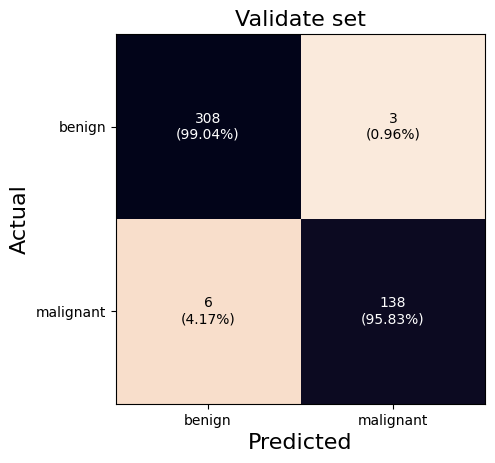

AUC1: 97.80 ± 2.04%


In [22]:
print("param1")
plot(param1_split1_cm_val , param1_split2_cm_val , param1_split3_cm_val , param1_split4_cm_val , param1_split5_cm_val)
Mean_SD("AUC1",param1_split1_AUC_val*100, param1_split2_AUC_val*100, param1_split3_AUC_val*100, param1_split4_AUC_val*100, param1_split5_AUC_val*100)

## overall param2

param2
split1
Sensitivity: 92.31%
Specificity: 98.08%
Accuracy: 95.60%
Precision: 97.30%
Sensitivity: 92.31%
Precision: 97.30%
F1: 94.74%

split2
Sensitivity: 94.74%
Specificity: 100.00%
Accuracy: 97.80%
Precision: 100.00%
Sensitivity: 94.74%
Precision: 100.00%
F1: 97.30%

split3
Sensitivity: 92.00%
Specificity: 98.48%
Accuracy: 96.70%
Precision: 95.83%
Sensitivity: 92.00%
Precision: 95.83%
F1: 93.88%

split4
Sensitivity: 94.74%
Specificity: 98.61%
Accuracy: 97.80%
Precision: 94.74%
Sensitivity: 94.74%
Precision: 94.74%
F1: 94.74%

split5
Sensitivity: 95.65%
Specificity: 97.06%
Accuracy: 96.70%
Precision: 91.67%
Sensitivity: 95.65%
Precision: 91.67%
F1: 93.62%

overall
sensitivity: 93.89 ± 1.63%
specificity: 98.45 ± 1.06%
accuracy: 96.92 ± 0.92%
precision: 95.91 ± 3.08%
f1_score: 94.85 ± 1.46%


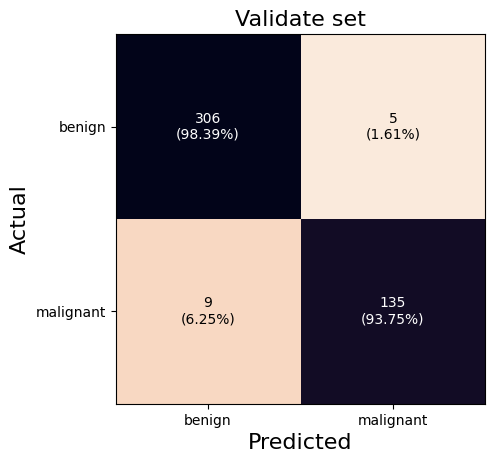

AUC2: 96.17 ± 0.94%


In [39]:
print("param2")
plot(param2_split1_cm_val , param2_split2_cm_val , param2_split3_cm_val , param2_split4_cm_val , param2_split5_cm_val)
Mean_SD("AUC2",param2_split1_AUC_val*100, param2_split2_AUC_val*100, param2_split3_AUC_val*100, param2_split4_AUC_val*100, param2_split5_AUC_val*100)

## overall param3

param3
split1
Sensitivity: 92.31%
Specificity: 98.08%
Accuracy: 95.60%
Precision: 97.30%
Sensitivity: 92.31%
Precision: 97.30%
F1: 94.74%

split2
Sensitivity: 92.11%
Specificity: 100.00%
Accuracy: 96.70%
Precision: 100.00%
Sensitivity: 92.11%
Precision: 100.00%
F1: 95.89%

split3
Sensitivity: 92.00%
Specificity: 98.48%
Accuracy: 96.70%
Precision: 95.83%
Sensitivity: 92.00%
Precision: 95.83%
F1: 93.88%

split4
Sensitivity: 94.74%
Specificity: 100.00%
Accuracy: 98.90%
Precision: 100.00%
Sensitivity: 94.74%
Precision: 100.00%
F1: 97.30%

split5
Sensitivity: 91.30%
Specificity: 98.53%
Accuracy: 96.70%
Precision: 95.45%
Sensitivity: 91.30%
Precision: 95.45%
F1: 93.33%

overall
sensitivity: 92.49 ± 1.31%
specificity: 99.02 ± 0.91%
accuracy: 96.92 ± 1.20%
precision: 97.72 ± 2.19%
f1_score: 95.03 ± 1.59%


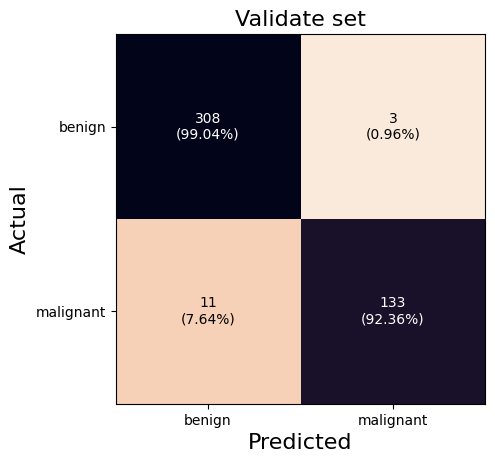

AUC3: 95.75 ± 1.00%


In [40]:
print("param3")
plot(param3_split1_cm_val , param3_split2_cm_val , param3_split3_cm_val , param3_split4_cm_val , param3_split5_cm_val)
Mean_SD("AUC3",param3_split1_AUC_val*100, param3_split2_AUC_val*100, param3_split3_AUC_val*100, param3_split4_AUC_val*100, param3_split5_AUC_val*100)

## overall param4

param4
split1
Sensitivity: 89.74%
Specificity: 98.08%
Accuracy: 94.51%
Precision: 97.22%
Sensitivity: 89.74%
Precision: 97.22%
F1: 93.33%

split2
Sensitivity: 89.47%
Specificity: 100.00%
Accuracy: 95.60%
Precision: 100.00%
Sensitivity: 89.47%
Precision: 100.00%
F1: 94.44%

split3
Sensitivity: 92.00%
Specificity: 98.48%
Accuracy: 96.70%
Precision: 95.83%
Sensitivity: 92.00%
Precision: 95.83%
F1: 93.88%

split4
Sensitivity: 94.74%
Specificity: 97.22%
Accuracy: 96.70%
Precision: 90.00%
Sensitivity: 94.74%
Precision: 90.00%
F1: 92.31%

split5
Sensitivity: 95.65%
Specificity: 98.53%
Accuracy: 97.80%
Precision: 95.65%
Sensitivity: 95.65%
Precision: 95.65%
F1: 95.65%

overall
sensitivity: 92.32 ± 2.82%
specificity: 98.46 ± 1.01%
accuracy: 96.26 ± 1.25%
precision: 95.74 ± 3.65%
f1_score: 93.92 ± 1.25%


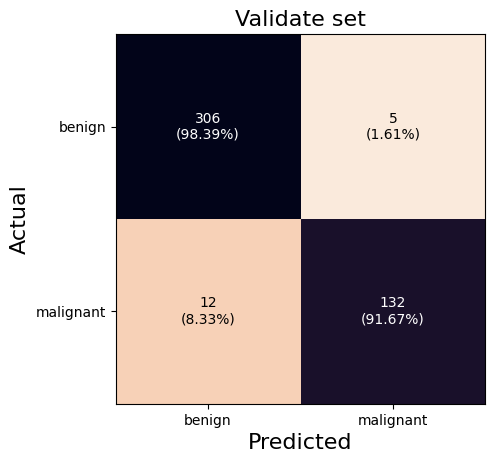

AUC4: 95.39 ± 1.21%


In [41]:
print("param4")
plot(param4_split1_cm_val , param4_split2_cm_val , param4_split3_cm_val , param4_split4_cm_val , param4_split5_cm_val)
Mean_SD("AUC4",param4_split1_AUC_val*100, param4_split2_AUC_val*100, param4_split3_AUC_val*100, param4_split4_AUC_val*100, param4_split5_AUC_val*100)

## overall param5

param5
split1
Sensitivity: 89.74%
Specificity: 98.08%
Accuracy: 94.51%
Precision: 97.22%
Sensitivity: 89.74%
Precision: 97.22%
F1: 93.33%

split2
Sensitivity: 89.47%
Specificity: 100.00%
Accuracy: 95.60%
Precision: 100.00%
Sensitivity: 89.47%
Precision: 100.00%
F1: 94.44%

split3
Sensitivity: 92.00%
Specificity: 98.48%
Accuracy: 96.70%
Precision: 95.83%
Sensitivity: 92.00%
Precision: 95.83%
F1: 93.88%

split4
Sensitivity: 94.74%
Specificity: 100.00%
Accuracy: 98.90%
Precision: 100.00%
Sensitivity: 94.74%
Precision: 100.00%
F1: 97.30%

split5
Sensitivity: 91.30%
Specificity: 98.53%
Accuracy: 96.70%
Precision: 95.45%
Sensitivity: 91.30%
Precision: 95.45%
F1: 93.33%

overall
sensitivity: 91.45 ± 2.12%
specificity: 99.02 ± 0.91%
accuracy: 96.48 ± 1.63%
precision: 97.70 ± 2.20%
f1_score: 94.46 ± 1.65%


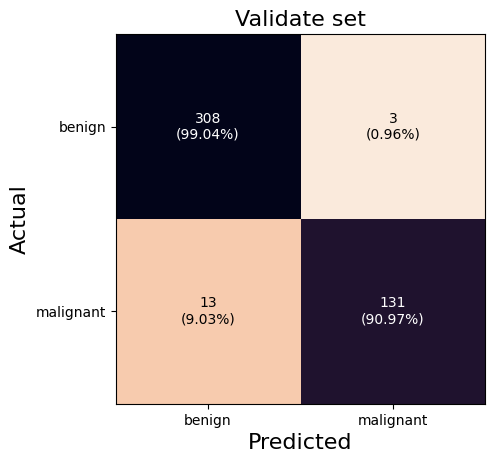

AUC5: 95.23 ± 1.29%


In [42]:
print("param5")
plot(param5_split1_cm_val , param5_split2_cm_val , param5_split3_cm_val , param5_split4_cm_val , param5_split5_cm_val)
Mean_SD("AUC5",param5_split1_AUC_val*100, param5_split2_AUC_val*100, param5_split3_AUC_val*100, param5_split4_AUC_val*100, param5_split5_AUC_val*100)

# Final test

In [23]:
# setting split and path final test
path = "../Anny_oversampling/DATA/"
train_path = "{}/train.csv".format(path)
test_path =  "{}/test.csv".format(path)
print(train_path)
# Load the train set
train_data = pd.read_csv(train_path)
print(train_data.shape)
x_train = train_data[train_data.columns[2:]]
print(x_train.shape)
y_train = train_data[train_data.columns[1]]
le = LabelEncoder()
y_train = np.array(le.fit_transform(y_train))
print(le.classes_)
print(test_path)
# Load the test set
test_data = pd.read_csv(test_path)
print(test_data.shape)
x_test = test_data[test_data.columns[3:]]
print(x_test.shape)
y_test = test_data[test_data.columns[2]]
le = LabelEncoder()
y_test = np.array(le.fit_transform(y_test))
print(le.classes_)
# StandardScaler
sc = StandardScaler()
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

svm = SVC(C=10, gamma=0.01, kernel='rbf')
lr = LogisticRegression(C=0.08685113737513521, max_iter=1000, penalty='l2', solver='lbfgs')
dt = DecisionTreeClassifier(criterion="gini", max_depth=4, min_samples_leaf=3, min_samples_split=7, splitter="random")
sgd = SGDClassifier(loss='hinge', penalty='elasticnet', learning_rate='optimal', eta0=0.001, max_iter=1000, alpha=0.01)
rf = RandomForestClassifier(bootstrap=False, criterion='gini', max_depth=6, max_features='sqrt', min_samples_leaf=3, min_samples_split=7, n_estimators=120)
ensemble = VotingClassifier(estimators=[('svm', svm), ('lr', lr), ('dt', dt), ('sgd', sgd), ('rf', rf)], voting='hard')
ensemble.fit(x_train, y_train)
joblib.dump(ensemble, 'ensemble_model_Final/ensemble_Final_model.joblib')

../Anny_oversampling/DATA//train.csv
(455, 32)
(455, 30)
['B' 'M']
../Anny_oversampling/DATA//test.csv
(114, 33)
(114, 30)
['B' 'M']


['ensemble_model_Final/ensemble_Final_model.joblib']

In [69]:
loaded_model = joblib.load('../temp/ensemble_model_Final/ensemble_Final_model.joblib')
# ################# test set ##################
label = ['benign','malignant']
print("################# test set ##################")
y_pred_test = loaded_model.predict(x_test)
# Print the predictions
# print(y_pred)

# Confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix')
print('-'*16)
print(cm_test,'\n')
print('-'*16)

# Calculate score
print(split)
sen_test = sensitivity(cm_test)
spec_test = specificity(cm_test)
acc_test = accuracy(cm_test)
pre_test = precision(cm_test)
f1_score_test = f1(cm_test)

# plot confusion matrix
# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_test = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_test, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_test.shape[1]),
       yticks=np.arange(cm_norm_test.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Test set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_test.max() / 2.
for i in range(cm_norm_test.shape[0]):
    for j in range(cm_norm_test.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_test[i,j], cm_norm_test[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_test[i, j] > thresh else "black")

plt.show()

################## plot ROC curve ########################
# fpr1, tpr1, thr1 = metrics.roc_curve(y_val,  y_pred_val)
# auc1 = metrics.roc_auc_score(y_val,  y_pred_val)
fpr2, tpr2, thr2 = metrics.roc_curve(y_test,  y_pred_test)
auc2 = metrics.roc_auc_score(y_test,  y_pred_test)
gmeans2 = np.sqrt(tpr2 * (1-fpr2))
ix2 = np.argmax(gmeans2)
print("---------------------------------------")
# print("AUC validate: %.4f" % auc1)
print("AUC test: %.4f" % auc2)
# plt.plot(fpr1,tpr1,label="ROC valid, auc="+str("%.4f" % auc1))
plt.plot(fpr2,tpr2,label="ROC test, auc="+str("%.4f" % auc2))
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

plt.legend(loc=4)
plt.show()

################# test set ##################


ValueError: X has 16 features, but SVC is expecting 30 features as input.

# Font size

############## validate set ################
Confusion Matrix
----------------
[[63  0]
 [ 0 28]] 

----------------
split1
Sensitivity: 100.00%
Specificity: 100.00%
Accuracy: 100.00%
Precision: 100.00%
Sensitivity: 100.00%
Precision: 100.00%
F1: 100.00%


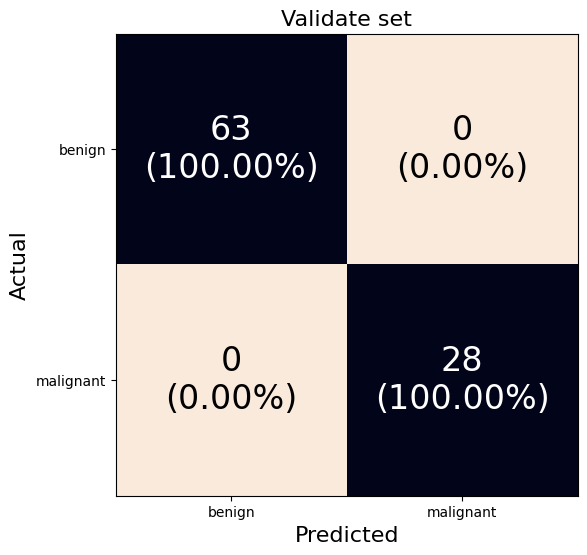

In [68]:
############## validate set ################
split = "split1"
loaded_model = joblib.load('SVM_model-ROC/SVM_{}.joblib'.format(split))
print("############## validate set ################")
y_pred_val = loaded_model.predict(x_val)

# Confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val)
print('Confusion Matrix')
print('-'*16)
print(cm_val,'\n')
print('-'*16)

# Calculate score
print(split)
sen_val = sensitivity(cm_val)
spec_val = specificity(cm_val)
acc_val = accuracy(cm_val)
pre_val = precision(cm_val)
f1_score_val = f1(cm_val)

class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_val = cm_val.astype('float') / cm_val.sum(axis=1)[:, np.newaxis]
# Create plot with larger size
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(cm_norm_val, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_val.shape[1]),
       yticks=np.arange(cm_norm_val.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Validate set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
        
# Add percentage and count values inside plot
thresh = cm_norm_val.max() / 2.
for i in range(cm_norm_val.shape[0]):
    for j in range(cm_norm_val.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_val[i,j], cm_norm_val[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_val[i, j] > thresh else "black",
               fontsize=24)
plt.show()

# threshold

In [72]:
def get_output(model, loader, with_prob=True):
    y_pred, y_true, = [], []
    if with_prob:
        y_prob = []
    else:
        y_prob = None
    for inputs, labels in loader:
        if torch.cuda.is_available():
            inputs = inputs.cuda()
            labels = labels.cuda()
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        if with_prob:
            probs = torch.nn.functional.softmax(outputs, dim=1)
        else:
            probs = None
        y_pred.append(preds.cpu().numpy())
        y_true.append(labels.cpu().numpy())
        if with_prob:
            y_prob.append(probs.detach().cpu().numpy())
    y_pred = np.concatenate(y_pred)
    y_true = np.concatenate(y_true)
    if with_prob:
        y_prob = np.concatenate(y_prob)
    return y_pred, y_true, y_prob

In [75]:
split_num = 1
split = "split{}".format(split_num)
x_train,y_train,x_test,y_test,x_val,y_val = setup(split)

../kitt/DATA_progress3//split1/train/train_oversampling.csv
(504, 18)
(504, 16)
['B' 'M']
../kitt/DATA_progress3//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3//split1/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


In [74]:
y_pred, y_true, y_prob = get_output(model, test_loader, with_prob=True)
# calculate roc curves
fpr, tpr, thresholds = metrics.roc_curve(y_true,  y_prob[:, 1])
# get the best threshold
J = tpr - fpr
ix = np.argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))
print('FPR: %.4f\nTPR: %.4f' %(fpr[ix], tpr[ix]))
def to_labels(pos_probs, threshold):
	return (pos_probs >= threshold).astype('int')


ytt = y_true
ypp = y_prob[:, 1]
pre_t = to_labels(ypp,best_thresh)
# y_pred=np.argmax(ypp, axis=1)
cm = confusion_matrix(ytt, pre_t)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
acc = accuracy_score(ytt, pre_t)
print("accuracy: %.4f" % acc)
# ytest[:, 1]
# ypred[1][:, 1]
# pre_t
# ypp
# thresholds_[i - 1]
cm = confusion_matrix(ytt, pre_t)
tn, fp, fn, tp = each_index(cm)
sen = tp / (tp + fn)
spec = tn / (tn + fp)
# print("accuracy: ", acc)
print("sensitivity: %.4f" %  sen)
print("specificity: %.4f" % spec)

# print(cm)
target_names = ['normal','abnormal']
# print(classification_report(ytt, pre_t, target_names=target_names))
print("---------------------------------------------------------------")
plt.figure(figsize=(6, 6))
# ax = sns.heatmap(cmn, cmap="rocket_r", fmt=".4f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax = sns.heatmap(cm, cmap="rocket_r", fmt=".01f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)

# Define class labels
class_names = ['normal', 'abnormal']

# Normalize confusion matrix to percentage
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm, interpolation='nearest', cmap="rocket_r")
ax.grid(False)

# Add labels
ax.set(xticks=np.arange(cm_norm.shape[1]),
       yticks=np.arange(cm_norm.shape[0]),
       xticklabels=class_names, yticklabels=class_names,
       title="split {}".format(split_num),
       ylabel='Actual',
       xlabel='Predicted')

# Add percentage and count values inside plot
thresh = cm_norm.max() / 2.
for i in range(cm_norm.shape[0]):
    for j in range(cm_norm.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm[i,j], cm_norm[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm[i, j] > thresh else "black", fontsize=20)

# Show plot
plt.show()


NameError: name 'model' is not defined

In [127]:
def evaluate(param,split):
    loaded_model = joblib.load('SVM_model-ROC/SVM_{}.joblib'.format(split))
    ############## validate set ################
    print("############## validate set ################")
    y_pred_val = loaded_model.predict_proba(x_val)
    # Confusion matrix 
    cm_val = confusion_matrix(y_val, np.round(y_pred_val).astype(int)) # error
    print('Confusion Matrix')
    print('-'*16)
    print(cm_val,'\n')
    print('-'*16)

    # Calculate score
    print(split)
    sen_val = sensitivity(cm_val)
    spec_val = specificity(cm_val)
    acc_val = accuracy(cm_val)
    pre_val = precision(cm_val)
    f1_score_val = f1(cm_val)

    # plot confusion matrix
    # plot confusion matrix
    class_names = ['benign','malignant']
    # Normalize confusion matrix to percentage
    cm_norm_val = cm_val.astype('float') / cm_val.sum(axis=1)[:, np.newaxis]
    # Create plot
    fig, ax = plt.subplots()
    im = ax.imshow(cm_norm_val, interpolation='nearest', cmap="rocket_r")
    ax.grid(False)
    # Add labels
    ax.set(xticks=np.arange(cm_norm_val.shape[1]),
           yticks=np.arange(cm_norm_val.shape[0]),
           xticklabels=class_names, yticklabels=class_names)
    ax.set_title("Validate set", fontsize=16)
    ax.set_ylabel('Actual', fontsize=16)
    ax.set_xlabel('Predicted', fontsize=16)
    # Add percentage and count values inside plot
    thresh = cm_norm_val.max() / 2.
    for i in range(cm_norm_val.shape[0]):
        for j in range(cm_norm_val.shape[1]):
            ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_val[i,j], cm_norm_val[i, j]*100),
                    ha="center", va="center",
                    color="white" if cm_norm_val[i, j] > thresh else "black",
                   fontsize=20)
    # plt.savefig('rf_model/validate_cm_{}.png'.format(split))
    # plt.savefig('rf_model/validate_cm_best_param2_{}.png'.format(split))
    plt.show()
    
    # calculate roc curves
    fpr, tpr, thresholds = metrics.roc_curve(y_true,  y_prob[:, 1])
    # get the best threshold
    J = tpr - fpr
    ix = np.argmax(J)
    best_thresh = thresholds[ix]
    print('Best Threshold=%f' % (best_thresh))
    print('FPR: %.4f\nTPR: %.4f' %(fpr[ix], tpr[ix]))
    def to_labels(pos_probs, threshold):
        return (pos_probs >= threshold).astype('int')
    
    # ################# test set ##################
    label = ['benign','malignant']
    print("################# test set ##################")
    y_pred_test = loaded_model.predict(x_test)
    # Print the predictions
    # print(y_pred)

    # Confusion matrix
    cm_test = confusion_matrix(y_test, y_pred_test)
    print('Confusion Matrix')
    print('-'*16)
    print(cm_test,'\n')
    print('-'*16)

    # Calculate score
    print(split)
    sen_test = sensitivity(cm_test)
    spec_test = specificity(cm_test)
    acc_test = accuracy(cm_test)
    pre_test = precision(cm_test)
    f1_score_test = f1(cm_test)

    # plot confusion matrix
    # plot confusion matrix
    class_names = ['benign','malignant']
    # Normalize confusion matrix to percentage
    cm_norm_test = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis]
    # Create plot
    fig, ax = plt.subplots()
    im = ax.imshow(cm_norm_test, interpolation='nearest', cmap="rocket_r")
    ax.grid(False)
    # Add labels
    ax.set(xticks=np.arange(cm_norm_test.shape[1]),
           yticks=np.arange(cm_norm_test.shape[0]),
           xticklabels=class_names, yticklabels=class_names)
    ax.set_title("Test set", fontsize=16)
    ax.set_ylabel('Actual', fontsize=16)
    ax.set_xlabel('Predicted', fontsize=16)
    # Add percentage and count values inside plot
    thresh = cm_norm_test.max() / 2.
    for i in range(cm_norm_test.shape[0]):
        for j in range(cm_norm_test.shape[1]):
            ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_test[i,j], cm_norm_test[i, j]*100),
                    ha="center", va="center",
                    color="white" if cm_norm_test[i, j] > thresh else "black",
                   fontsize=20)

    plt.show()

    ################## plot ROC curve ########################
    fpr1, tpr1, thr1 = metrics.roc_curve(y_val,  y_pred_val)
    auc1 = metrics.roc_auc_score(y_val,  y_pred_val)
    fpr2, tpr2, thr2 = metrics.roc_curve(y_test,  y_pred_test)
    auc2 = metrics.roc_auc_score(y_test,  y_pred_test)
    gmeans2 = np.sqrt(tpr2 * (1-fpr2))
    ix2 = np.argmax(gmeans2)
    print("---------------------------------------")
    print("AUC validate: %.4f" % auc1)
    print("AUC test: %.4f" % auc2)
    plt.plot(fpr1,tpr1,label="ROC valid, auc="+str("%.4f" % auc1))
    plt.plot(fpr2,tpr2,label="ROC test, auc="+str("%.4f" % auc2))
    plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

    plt.legend(loc=4)
    plt.show()
    return cm_val,cm_test,auc1,auc2


In [128]:
split_num = 1
split = "split{}".format(split_num)
x_train,y_train,x_test,y_test,x_val,y_val = setup(split)
param = 1
param1_split1_cm_val, param1_split1_cm_test, param1_split1_AUC_val, param1_split1_AUC_test = evaluate(param,split)

../kitt/DATA_progress3//split1/train/train_oversampling.csv
(504, 18)
(504, 16)
['B' 'M']
../kitt/DATA_progress3//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3//split1/val/val.csv
(91, 18)
(91, 16)
['B' 'M']
############## validate set ################


ValueError: Classification metrics can't handle a mix of binary and multilabel-indicator targets